# **Proyeto para Data Science**
## **La Promesa**

    Creado: Sebastián Aguilera, Diego Almeida, Katherine Alvarez
    Fecha: 31-05-2023
    Módulo: Proyeto para Data Science
    Generación: G54

In [3]:
# Importacion de librerias basicas para el manejo de datos
import pandas as pd
import numpy as np

# Importacion de librerias basicas para la graficación de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librería para analizar la distribución de valores NaN
import missingno as msgn

# Librería que omite mensajes de advertencia
import warnings
warnings.filterwarnings(action="ignore")

# Importar archivos .py con funciones
import function as fun

import math
from scipy import stats

#Importar librerias para modelos predictivos
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from pygam import LinearGAM, s, f
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import statsmodels.api as sm
from sklearn.inspection import permutation_importance

import os
import pickle

### **Descripción del Requerimiento:**

Una empresa que lleva productos a domicilio de distintos supermercados del país, realiza una promesa a sus clientes comprometiéndose con un día y hora de entrega de los productos. Esta promesa la hace utilizando un modelo predictivo.

Requerimientos:

1. Informar el error del actual modelo por día.
2. Crear un modelo que desafíe el modelo actual.
3. Crear una estrategia que permita cumplir con la promesa realizada al cliente.


In [4]:
# Importamos nuestro dataset con el separador ;
Orden_compra = pd.read_csv('1_Orden_compra.csv', sep=';')
Orden_productos = pd.read_csv('2_Orden_productos.csv', sep=';')
Recolector = pd.read_csv('3_Recolector.csv', sep=';')
Tienda = pd.read_csv('4_tienda.csv', sep=';')

### **Descripción de las variables según documento**
Orden_compra:
- id_orden: Identificador del pedido de compra.
- Latitud: Dirección de entrega.
- Longitud: Dirección de entrega.
- Día: Día de la semana en que se prometió la orden.
○ 0: Domingo.
○ 1: Lunes.
○ 2: Martes.
○ 3: Miércoles.
○ 4: Jueves.
○ 5: Viernes.
○ 6: Sábado.
- Promesa: Hora de entrega prometida al cliente.
- Entrega: Hora en que se entregó el pedido al cliente
- id_entrega: Si el pedido fue solicitado en “Menos de 90 minutos” o en una ventana horario en el futuro.
- id_recolector: Identificador de la persona que recolectó el pedido.
- id_transporte: Identificador de la persona que hizo transporte del pedido.
- id_local: Identificador del local en que se realizó la compra.
- Tiempo: Tiempo total que demoró completar la orden (desde la compra hasta la entrega).

Orden_productos:
- id_orden: Identificador del pedido de compra.
- id_productos: Identificador del producto.
- cant_producto: Cantidad solicitada del producto por el cliente.
- cant_encontrada: Cantidad solicitada del producto por el cliente.
- Unidad: Formato en que se vendió el producto (Unidades o KG).

Recolector:  
- id_recolector: Identificador recolector.
- Clasificación_recolector: Clasificación de experiencia recolector.
-  P_aciertos: Porcentaje histórico de productos que el recolector encontró.
- Velocidad: Velocidad histórica de recogida de productos.
- P_aceptacion: Porcentaje histórico de pedidos aceptado por el recolector.
- Score_Recolector: Evaluación del recolector.

Tienda:
- id_Tienda: Identificador de la tienda.
- tienda: Identificador de la tienda a la cual pertenece la tienda.
- latitud_tienda: Latitud de la ubicación de la tienda.
- Longitud_tienda: Longitud de la ubicación de la tienda.

#### Para validar y encontrar los tipos de datos utilizaremos la función: dataframe_info. El fin de esto es contrastar si los tipos de datos se condicen y concuerdan para tratar los datos a conveniencia más adelante, además, de verificar los NaN's.

In [5]:
# Orden_compra
print(fun.dataframe_info(Orden_compra, "Orden_compra"))

Orden_compra.head()

Dataset Name: Orden_compra
Column Name        Data Type  #Distinct  NaN Values
order_id           object     7295       0         
lat                object     7295       0         
lng                object     7295       0         
dow                int64      7          0         
promised_time      object     809        0         
actual_time        object     6766       0         
on_demand          bool       2          0         
picker_id          object     598        0         
driver_id          object     597        0         
store_branch_id    object     113        0         
total_minutes      object     6543       752       
None


,order_id,lat,lng,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes
0,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,13:00:00,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,91.800.861
1,0d37a1eea001f01b40232ffd496ff663,18.177.712.202.580.300,-10.035.705.073.096.900,2,13:00:00,10:28:10,False,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,206.599.732
2,528428e9b9eb5d3bd0dbdd8da692b087,1.826.683.205.404.410,-10.031.755.280.890.600,2,11:00:00,10:40:50,False,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,93.458.001
3,d3f7be6d64eae7405b7bf024e04807a2,18.248.884.004.419.400,-1.003.226.215.187.040,2,10:00:00,9:41:47,False,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,124.778.761
4,e0ad6533b6cd9a382ec6c1d473c5036c,1.822.911.027.242.010,-10.032.267.241.783.800,2,11:00:00,10:07:53,False,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,130.321.208


In [6]:
# Orden_productos
print(fun.dataframe_info(Orden_productos, "Orden_productor"))

Orden_productos.head()

Dataset Name: Orden_productor
Column Name        Data Type  #Distinct  NaN Values
order_id           object     7278       0         
product_id         object     24999      0         
quantity           object     525        0         
quantity_found     float64    1537       0         
buy_unit           object     2          0         
None


,order_id,product_id,quantity,quantity_found,buy_unit
0,bdfc44fb525986b7bab8c589fc47e853,ab9757d9892b0e83ab3a1c1af0c84c52,0.75,0.155,KG
1,bdfc44fb525986b7bab8c589fc47e853,f1f042251bf634d44f338fbaf13b16e4,0.3,0.400,KG
2,bdfc44fb525986b7bab8c589fc47e853,0630d47440965509b0b3f80fd1b3578f,1,1.000,UN
3,bdfc44fb525986b7bab8c589fc47e853,9dd69b1f300666d5573e3a9934f2e03e,2,2.000,UN
4,bdfc44fb525986b7bab8c589fc47e853,3dfcdbe308bde67370649dd875f2507b,1,1.000,UN


In [7]:
# Recolector
print(fun.dataframe_info(Recolector, "Recolector"))

Recolector.head()

Dataset Name: Recolector
Column Name        Data Type  #Distinct  NaN Values
shopper_id         object     600        0         
seniority          object     4          0         
found_rate         float64    442        36        
picking_speed      float64    203        0         
accepted_rate      float64    30         6         
rating             float64    50         34        
None


,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
0,087ab65ceca40dbef697f585dc159d5d,ADVANCED,0.8610,1.64,1.00,4.48
1,645973c41314d763b58dc2bceeeeffc9,INTERMEDIATE,0.8337,2.83,0.96,4.79
2,82810715fdda44962e7e422015ea1f32,ADVANCED,0.8681,1.27,0.88,4.84
3,416aa7dbd5a2f58d7bca96657e8faa1e,INTERMEDIATE,0.8784,2.11,1.00,NaN
4,27a3e845a4c3eb7ded4748f84140a843,ADVANCED,0.8466,1.50,1.00,4.84


In [8]:
# Tienda
print(fun.dataframe_info(Tienda, "Tienda"))

Tienda.head()

Dataset Name: Tienda
Column Name        Data Type  #Distinct  NaN Values
store_branch_id    object     113        0         
store              object     17         0         
lat                object     113        0         
lng                object     113        0         
None


,store_branch_id,store,lat,lng
0,cf0895f1e3beb8164f0a86e6f940ae56,c0b93cf93cf854981b8d6bd849eec4b0,18.160.308.413.602.800,-10.026.067.265.111.100
1,3ddd4c29cab4178d89d549c6ba65c236,044d56734d20e04984d846dade6d39f3,1.827.282.968.914.450,-10.031.881.435.593.900
2,e9763f24fd46d0b9e52d423207a87c3c,452ae015bf846e1d2932b7ea15720d64,18.273.494.015.704.800,-10.031.958.539.978.200
3,49b7d60d6095a9f1129ce798102b62f4,6447951cd071f6f045fd4e6194920926,1.824.774.341.566.610,-10.040.355.771.938.600
4,8f21cfda17b340aeee062220d0bee8e5,452ae015bf846e1d2932b7ea15720d64,18.203.111.495.565.700,-10.029.771.361.550.100


______________________________________________________________________________

## **Ingeniería de Características (Feature engineering):**

### **Recodificación y resignificación de variables:**

Orden_compra:
- order_id: Identificador del pedido de compra.
- lat: Latitud de la dirección de entrega.
- lng: Longitud de la dirección de entrega.
- dow: Día de la semana en que se prometió la orden.
○ 0: Domingo.
○ 1: Lunes.
○ 2: Martes.
○ 3: Miércoles.
○ 4: Jueves.
○ 5: Viernes.
○ 6: Sábado.
- promised_time: Hora de entrega prometida al cliente en minutos.
- actual_time: Hora en que se entregó el pedido al cliente en minutos.
- on_demand: Indica si el pedido fue hecho para ser entregado tan pronto como sea posible, en lugar de programarlo para una hora específicas.
- picker_id: Identificador de la persona que recolectó el pedido.
- driver_id: Identificador de la persona que hizo transporte del pedido.
- store_branch_id: Identificador del local en que se realizó la compra.
- total_minutes: Tiempo total que demoró completar la orden (desde la compra hasta la entrega).


##### **Resignificaremos on_demand  como  que si se refiriese a un servicio que se proporciona o se realiza cuando se solicita o se necesita. En el contexto de una entrega o pedido, "on_demand" probablemente indica si el pedido fue hecho para ser entregado tan pronto como sea posible, en lugar de programarlo para una hora específica. Es decir, si "on_demand" es verdadero (o 1), el pedido fue hecho para ser entregado inmediatamente, y si es falso (o 0), el pedido fue programado para una entrega posterior.**


Orden_productos:
- order_id: Identificador del pedido de compra.
- product_id: Identificador del producto.
- quantity: Cantidad solicitada del producto por el cliente.
- quantity_found: Cantidad solicitada del producto por el cliente.
- buy_unit: Formato en que se vendió el producto (Unidades o KG).

Recolector:
- shopper_id: Identificador recolector.
- seniority: Clasificación de experiencia recolector.
- found_rate: Porcentaje histórico de productos que el recolector encontró.
- picking_speed: Velocidad histórica de recogida de productos.
- accepted_rate: Porcentaje histórico de pedidos aceptado por el recolector.
- rating: Evaluación del recolector.

Tienda:
- store_branch_id: Identificador de la tienda.
- store: Identificador de la tienda a la cual pertenece la tienda.
- lat: Latitud de la ubicación de la tienda.
- lng: Longitud de la ubicación de la tienda

#### **Tratamiento de recodificación Para Orden_compra:**

In [9]:
Orden_compra.head()

,order_id,lat,lng,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes
0,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,13:00:00,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,91.800.861
1,0d37a1eea001f01b40232ffd496ff663,18.177.712.202.580.300,-10.035.705.073.096.900,2,13:00:00,10:28:10,False,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,206.599.732
2,528428e9b9eb5d3bd0dbdd8da692b087,1.826.683.205.404.410,-10.031.755.280.890.600,2,11:00:00,10:40:50,False,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,93.458.001
3,d3f7be6d64eae7405b7bf024e04807a2,18.248.884.004.419.400,-1.003.226.215.187.040,2,10:00:00,9:41:47,False,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,124.778.761
4,e0ad6533b6cd9a382ec6c1d473c5036c,1.822.911.027.242.010,-10.032.267.241.783.800,2,11:00:00,10:07:53,False,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,130.321.208


In [10]:
# Convertir las columnas 'promised_time' y 'actual_time' a minutos
Orden_compra['promised_time'] = Orden_compra['promised_time'].apply(fun.time_string_to_minutes)
Orden_compra['actual_time'] = Orden_compra['actual_time'].apply(fun.time_string_to_minutes)

In [11]:
# Revisión de valores unicos para la variable On_demand
valores_unicos = Orden_compra['on_demand'].unique()
print(valores_unicos)

[False  True]


In [12]:
# False siendo 0 y True siendo 1
Orden_compra['on_demand'] = Orden_compra['on_demand'].astype(int)

In [13]:
# Visualizar resultados de recodificación
Orden_compra.head()

,order_id,lat,lng,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes
0,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,780.0,720.250000,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,91.800.861
1,0d37a1eea001f01b40232ffd496ff663,18.177.712.202.580.300,-10.035.705.073.096.900,2,780.0,628.166667,0,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,206.599.732
2,528428e9b9eb5d3bd0dbdd8da692b087,1.826.683.205.404.410,-10.031.755.280.890.600,2,660.0,640.833333,0,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,93.458.001
3,d3f7be6d64eae7405b7bf024e04807a2,18.248.884.004.419.400,-1.003.226.215.187.040,2,600.0,581.783333,0,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,124.778.761
4,e0ad6533b6cd9a382ec6c1d473c5036c,1.822.911.027.242.010,-10.032.267.241.783.800,2,660.0,607.883333,0,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,130.321.208


#### **Tratamiento de recodificación para Orden_productos:**

In [14]:
Orden_productos.head()

,order_id,product_id,quantity,quantity_found,buy_unit
0,bdfc44fb525986b7bab8c589fc47e853,ab9757d9892b0e83ab3a1c1af0c84c52,0.75,0.155,KG
1,bdfc44fb525986b7bab8c589fc47e853,f1f042251bf634d44f338fbaf13b16e4,0.3,0.400,KG
2,bdfc44fb525986b7bab8c589fc47e853,0630d47440965509b0b3f80fd1b3578f,1,1.000,UN
3,bdfc44fb525986b7bab8c589fc47e853,9dd69b1f300666d5573e3a9934f2e03e,2,2.000,UN
4,bdfc44fb525986b7bab8c589fc47e853,3dfcdbe308bde67370649dd875f2507b,1,1.000,UN


In [15]:
# Obtener los valores unicos de la variable buy_unit
valores_unicos = Orden_productos['buy_unit'].unique()
print(valores_unicos)

['KG' 'UN']


In [16]:
# Reemplazo de KG 0 y UN 1
Orden_productos['buy_unit'] = Orden_productos['buy_unit'].replace({'KG': 0, 'UN': 1})

In [17]:
# código para dividir la columna 'quantity_found' y agregar una nueva 
# columna con los nombres correspondientes ('quantity_foundkg' y 'quantity_foundun') 
# según el valor de 'buy_unit'. Los valores donde se separan las columnas serán imputados con 0

Orden_productos['quantity_foundkg'] = Orden_productos['quantity_found'].where(Orden_productos['buy_unit'] == 0, 0)
Orden_productos['quantity_foundun'] = Orden_productos['quantity_found'].where(Orden_productos['buy_unit'] == 1, 0)

In [18]:
# Eliminar la columna 'quantity_found' ya que fue separada por el código anterior
Orden_productos.drop('quantity_found', axis=1, inplace=True)
Orden_productos.drop('buy_unit', axis=1, inplace=True)

In [19]:
# revisar tipo de datos
print(Orden_productos['quantity_foundkg'].dtypes)
print(Orden_productos['quantity_foundun'].dtypes)

float64
float64


In [20]:
print(Orden_productos['quantity_foundkg'])

0         0.155
1         0.400
2         0.000
3         0.000
4         0.000
          ...  
120871    0.000
120872    0.000
120873    0.000
120874    0.000
120875    0.000
Name: quantity_foundkg, Length: 120876, dtype: float64


In [21]:
# Visualizar el tipo de datos de la variable quantity
print(Orden_productos['quantity'].dtypes)

object


**Recodificacion Variable quantity de object a float**

Realizaremos un ajuste de la columna quantity debido a que tiene valores que estan mal formateados y en vez de expresarse como decimales, lo esta haciendo como entero de trillones, lo cual al momento de procesar los datos, arroja errores.

In [22]:
# Convertir todos los valores en 'quantity' a números flotantes
Orden_productos['quantity'] = pd.to_numeric(Orden_productos['quantity'], errors='coerce')

# Obtener los valores únicos, convertirlos en una lista y ordenarlos
sorted_unique_values = sorted(Orden_productos['quantity'].unique().tolist())

# Mostrar la lista
for value in sorted_unique_values:
    print("{:.10f}".format(value))

0.0150000000
0.0270000000
0.0290000000
0.0330000000
0.0360000000
0.0450000000
0.0500000000
0.0540000000
0.0570000000
0.0600000000
0.0660000000
0.0750000000
0.0870000000
0.0910000000
0.0990000000
0.1000000000
0.1010000000
0.1020000000
0.1160000000
0.1200000000
0.1250000000
0.1450000000
0.1500000000
0.1600000000
0.1650000000
0.1670000000
0.1680000000
0.1690000000
0.1800000000
0.1820000000
0.2000000000
0.2010000000
0.2020000000
0.2030000000
0.2040000000
0.2100000000
0.2200000000
0.2210000000
0.2220000000
0.2231120000
0.2280000000
0.2300000000
0.2400000000
0.2500000000
0.2650000000
0.2730000000
0.2750000000
0.2800000000
0.2860000000
0.2900000000
0.3000000000
0.3100000000
0.3200000000
0.3210000000
0.3300000000
0.3310000000
0.3320000000
0.3330000000
0.3340000000
0.3350000000
0.3360000000
0.3370000000
0.3380000000
0.3400000000
0.3500000000
0.3600000000
0.3640000000
0.3750000000
0.4000000000
0.4010000000
0.4020000000
0.4030000000
0.4040000000
0.4070000000
0.4150000000
0.4200000000
0.4250000000

In [23]:
# Visualizar resultados de recodificación
Orden_productos.head()

,order_id,product_id,quantity,quantity_foundkg,quantity_foundun
0,bdfc44fb525986b7bab8c589fc47e853,ab9757d9892b0e83ab3a1c1af0c84c52,0.75,0.155,0.0
1,bdfc44fb525986b7bab8c589fc47e853,f1f042251bf634d44f338fbaf13b16e4,0.30,0.400,0.0
2,bdfc44fb525986b7bab8c589fc47e853,0630d47440965509b0b3f80fd1b3578f,1.00,0.000,1.0
3,bdfc44fb525986b7bab8c589fc47e853,9dd69b1f300666d5573e3a9934f2e03e,2.00,0.000,2.0
4,bdfc44fb525986b7bab8c589fc47e853,3dfcdbe308bde67370649dd875f2507b,1.00,0.000,1.0


#### **Tratamiento de recodificación para Recolector:**

In [24]:
Recolector.head()

,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
0,087ab65ceca40dbef697f585dc159d5d,ADVANCED,0.8610,1.64,1.00,4.48
1,645973c41314d763b58dc2bceeeeffc9,INTERMEDIATE,0.8337,2.83,0.96,4.79
2,82810715fdda44962e7e422015ea1f32,ADVANCED,0.8681,1.27,0.88,4.84
3,416aa7dbd5a2f58d7bca96657e8faa1e,INTERMEDIATE,0.8784,2.11,1.00,NaN
4,27a3e845a4c3eb7ded4748f84140a843,ADVANCED,0.8466,1.50,1.00,4.84


In [25]:
# Obtener los valores unicos de la variable seniority
valores_unicos = Recolector['seniority'].unique()
print(valores_unicos)

['ADVANCED' 'INTERMEDIATE' 'REVIEW' 'BEGINNER']


In [26]:
# Recodificar la variable seniority a númerica
Recolector['seniority'] = Recolector['seniority'].replace({
    'BEGINNER': 0,
    'INTERMEDIATE': 1,
    'ADVANCED': 2,
    'REVIEW': 3
})

In [27]:
# Visualizar resultados de recodificación
Recolector.head()

,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
0,087ab65ceca40dbef697f585dc159d5d,2,0.8610,1.64,1.00,4.48
1,645973c41314d763b58dc2bceeeeffc9,1,0.8337,2.83,0.96,4.79
2,82810715fdda44962e7e422015ea1f32,2,0.8681,1.27,0.88,4.84
3,416aa7dbd5a2f58d7bca96657e8faa1e,1,0.8784,2.11,1.00,NaN
4,27a3e845a4c3eb7ded4748f84140a843,2,0.8466,1.50,1.00,4.84


#### **Tratamiento de recodificación para Tienda:** 
para este dataframe no realizaremos una recodificación lo mantendremos a conveniencia de esta manera para más adelante.

In [28]:
# Visualizar resultados de recodificación
Tienda.head()

,store_branch_id,store,lat,lng
0,cf0895f1e3beb8164f0a86e6f940ae56,c0b93cf93cf854981b8d6bd849eec4b0,18.160.308.413.602.800,-10.026.067.265.111.100
1,3ddd4c29cab4178d89d549c6ba65c236,044d56734d20e04984d846dade6d39f3,1.827.282.968.914.450,-10.031.881.435.593.900
2,e9763f24fd46d0b9e52d423207a87c3c,452ae015bf846e1d2932b7ea15720d64,18.273.494.015.704.800,-10.031.958.539.978.200
3,49b7d60d6095a9f1129ce798102b62f4,6447951cd071f6f045fd4e6194920926,1.824.774.341.566.610,-10.040.355.771.938.600
4,8f21cfda17b340aeee062220d0bee8e5,452ae015bf846e1d2932b7ea15720d64,18.203.111.495.565.700,-10.029.771.361.550.100


## **Revisamos la distribución de NaN's con missigno en cada Dataframe recodificado**

(7295, 11)


<AxesSubplot:>

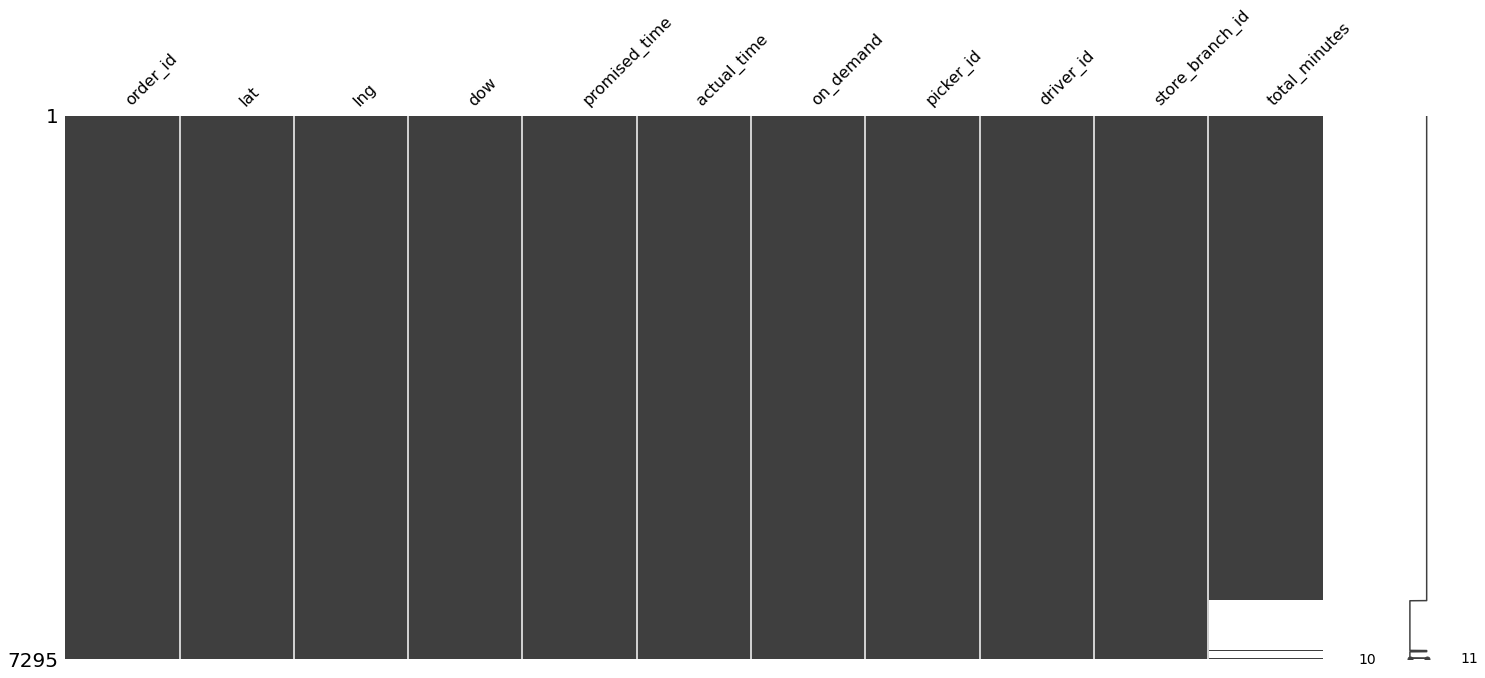

In [29]:
# Distribución de Orden_compra
print(Orden_compra.shape)

# Se utiliza missigno para revisar datos perdidos por tabla
msgn.matrix(Orden_compra)

(120876, 5)


<AxesSubplot:>

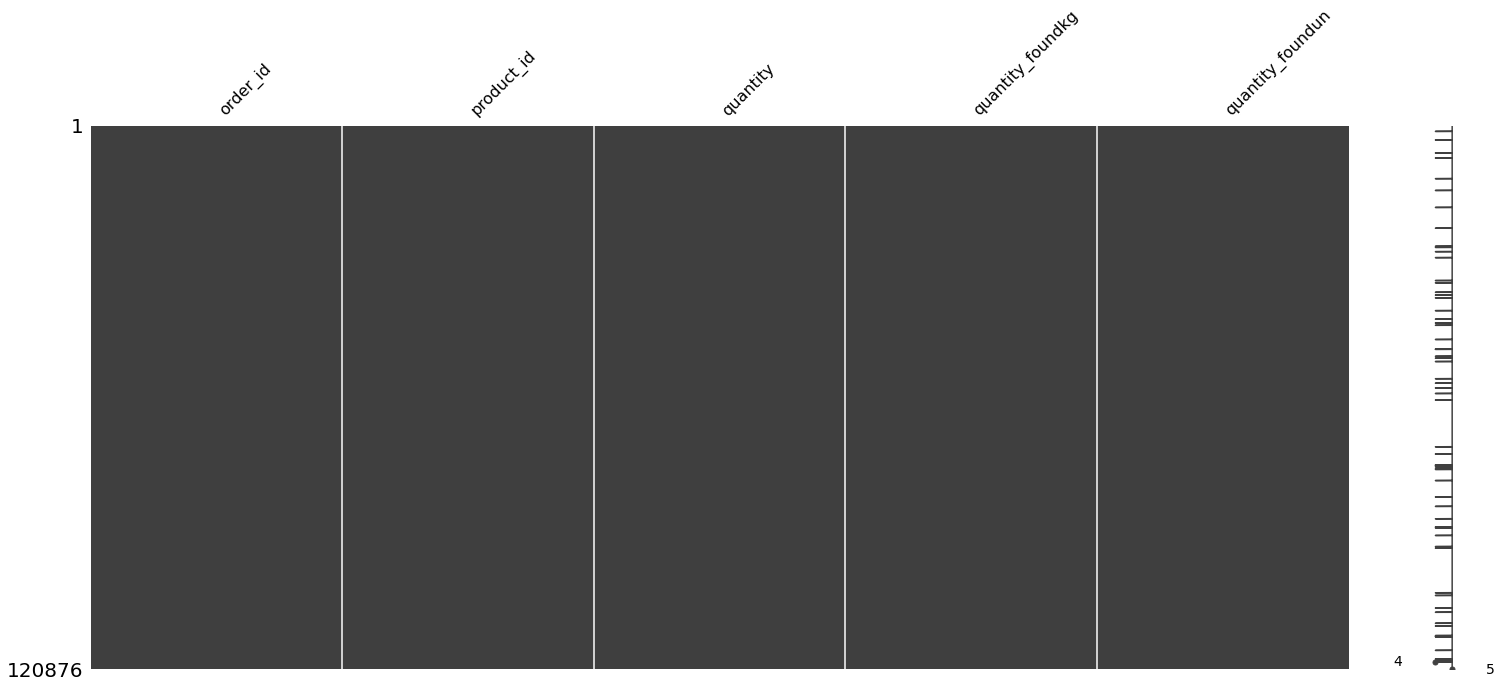

In [30]:
# Distribución de Orden_compra
print(Orden_productos.shape)

# Se utiliza missigno para revisar datos perdidos por tabla
msgn.matrix(Orden_productos)

(600, 6)


<AxesSubplot:>

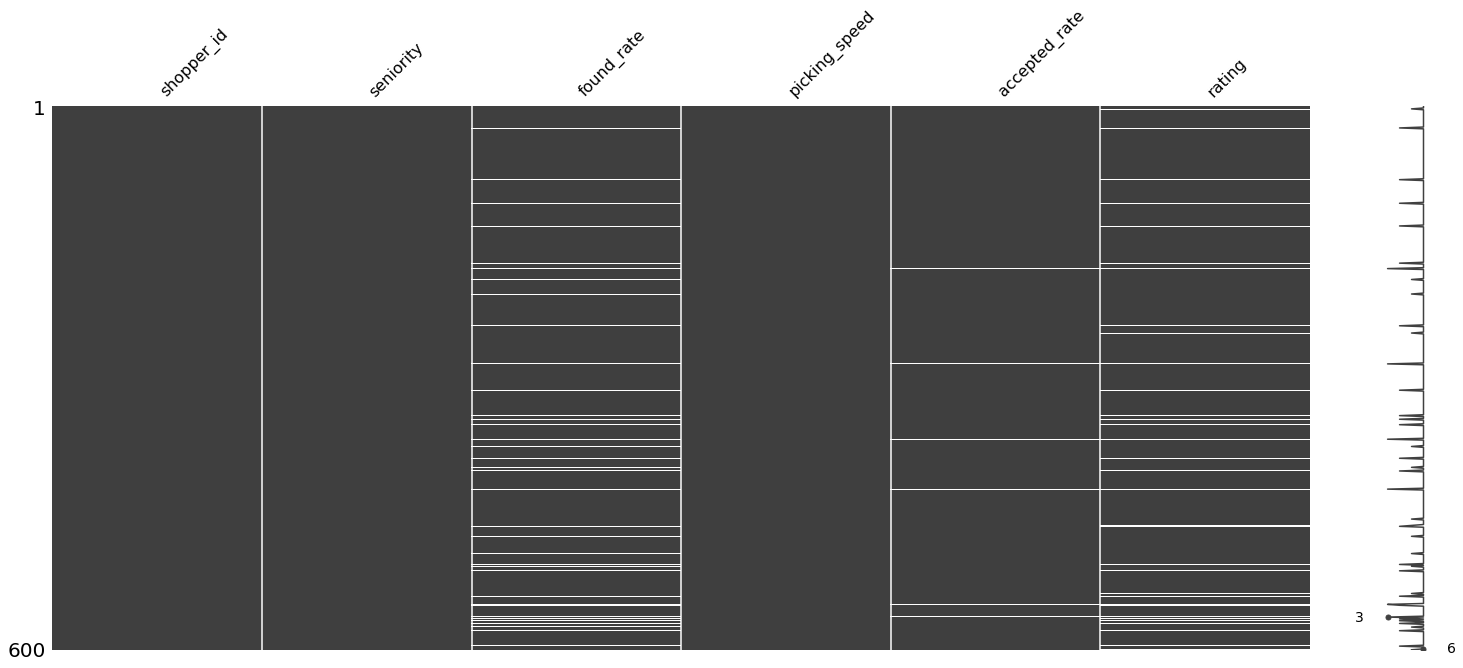

In [31]:
# Distribución de Orden_compra
print(Recolector.shape)

# Se utiliza missigno para revisar datos perdidos por tabla
msgn.matrix(Recolector)

(113, 4)


<AxesSubplot:>

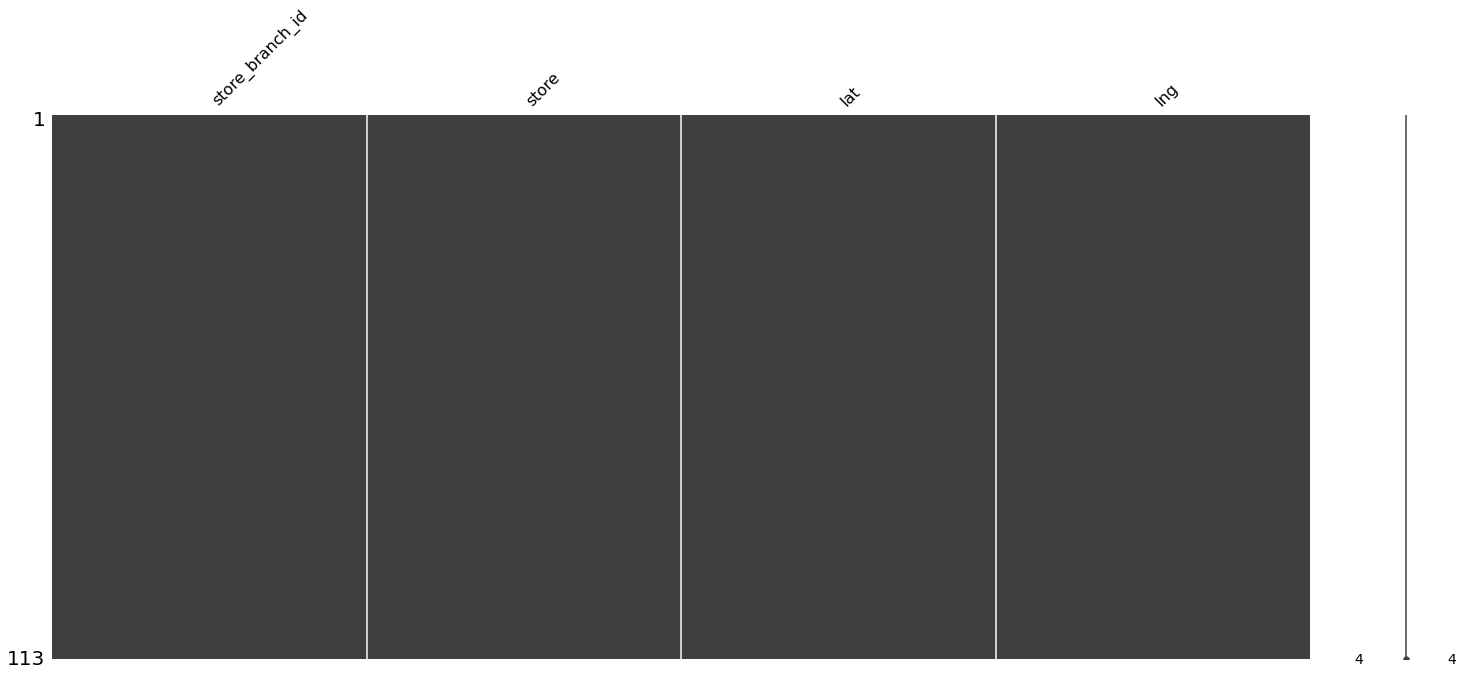

In [32]:
# Distribución de Orden_compra
print(Tienda.shape)

# Se utiliza missigno para revisar datos perdidos por tabla
msgn.matrix(Tienda)

In [33]:
# Destalle de NaN's
print("Datos faltantes en Orden_compra:")
print(fun.missing_data(Orden_compra))
print("\nDatos faltantes en Orden_productos:")
print(fun.missing_data(Orden_productos))
print("Datos faltantes en Recolector:")
print(fun.missing_data(Recolector))
print("\nDatos faltantes en Tienda:")
print(fun.missing_data(Tienda))

Datos faltantes en Orden_compra:
                 Total missing  Percentage
order_id                     0     0.00000
lat                          0     0.00000
lng                          0     0.00000
dow                          0     0.00000
promised_time                0     0.00000
actual_time                  0     0.00000
on_demand                    0     0.00000
picker_id                    0     0.00000
driver_id                    0     0.00000
store_branch_id              0     0.00000
total_minutes              752    10.30843

Datos faltantes en Orden_productos:
                  Total missing  Percentage
order_id                      0    0.000000
product_id                    0    0.000000
quantity                     62    0.051292
quantity_foundkg              0    0.000000
quantity_foundun              0    0.000000
Datos faltantes en Recolector:
               Total missing  Percentage
shopper_id                 0    0.000000
seniority                  0    0.000

### **Eliminación de Datos Perdidos**
Como estrategía habiamos definido que si el porcentaje de datos perdidos era inferior a 15%, se eliminarian. Por lo que se procede a eliminar todos estos datos NaN's

In [34]:
# Eliminar las filas con NaN 
Orden_compra = fun.drop_rows_with_nan(Orden_compra)
Orden_productos = fun.drop_rows_with_nan(Orden_productos)
Recolector = fun.drop_rows_with_nan(Recolector)

# Verificar el resultado
print("Shape de Orden_compra_sn_nan, sin filas con NaN:")
print(Orden_compra.shape)

print("Shape de Orden_productos_sn_nan, sin filas con NaN:")
print(Orden_productos.shape)

print("\nShape de Recolector_sn_nan, sin filas con NaN:")
print(Recolector.shape)

Shape de Orden_compra_sn_nan, sin filas con NaN:
(6543, 11)
Shape de Orden_productos_sn_nan, sin filas con NaN:
(120814, 5)

Shape de Recolector_sn_nan, sin filas con NaN:
(558, 6)


<AxesSubplot:>

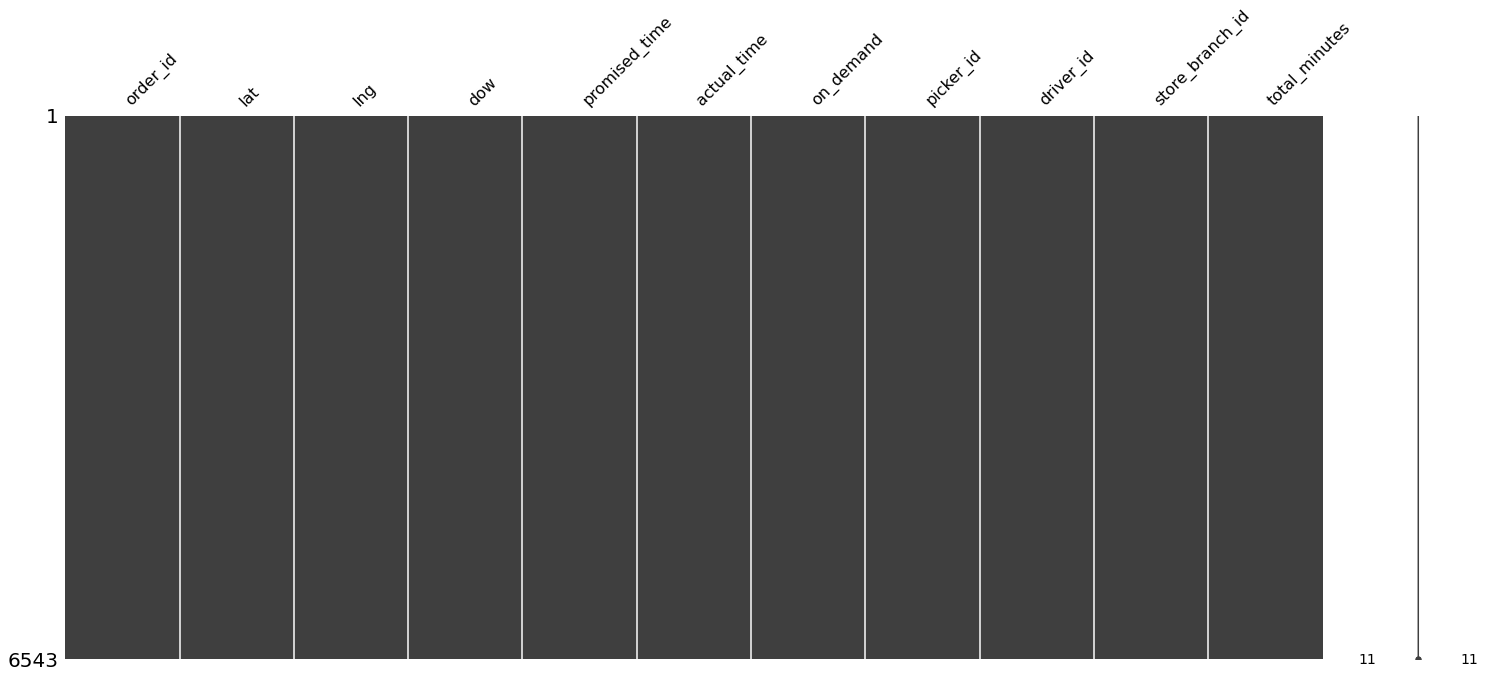

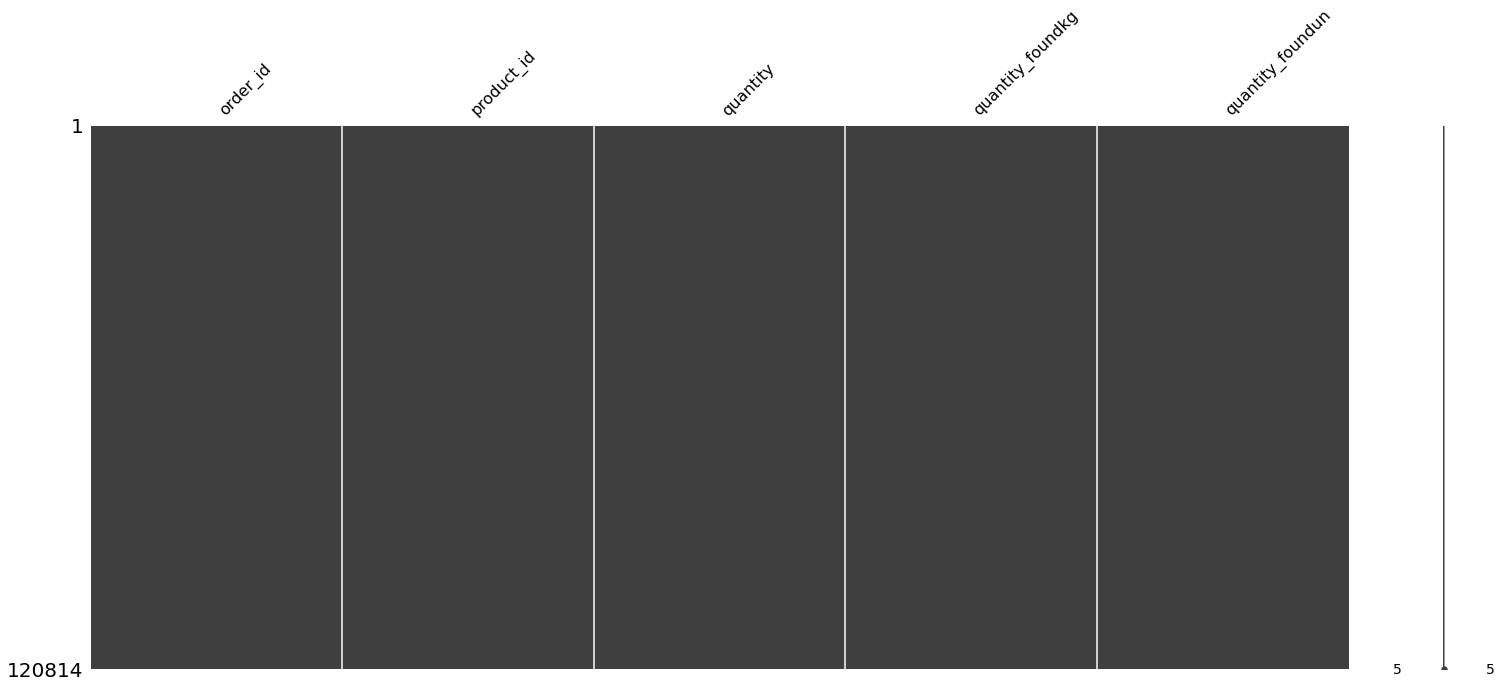

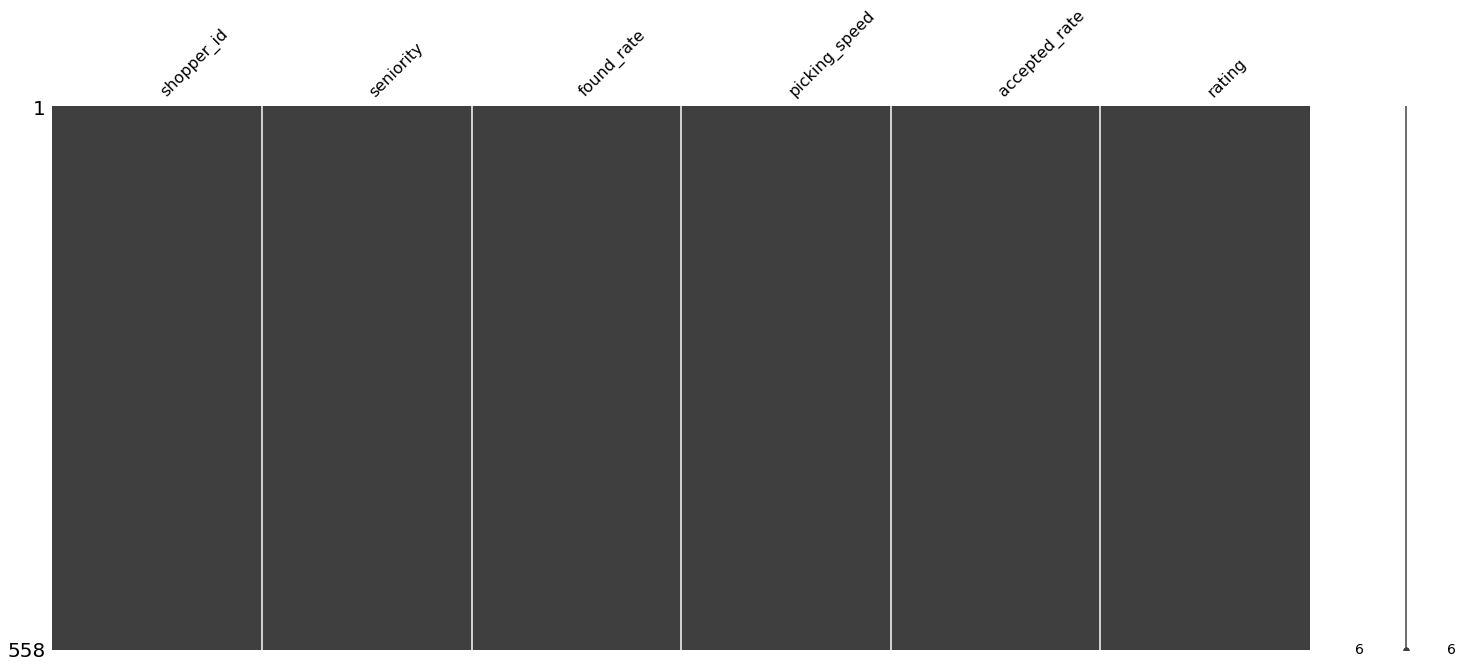

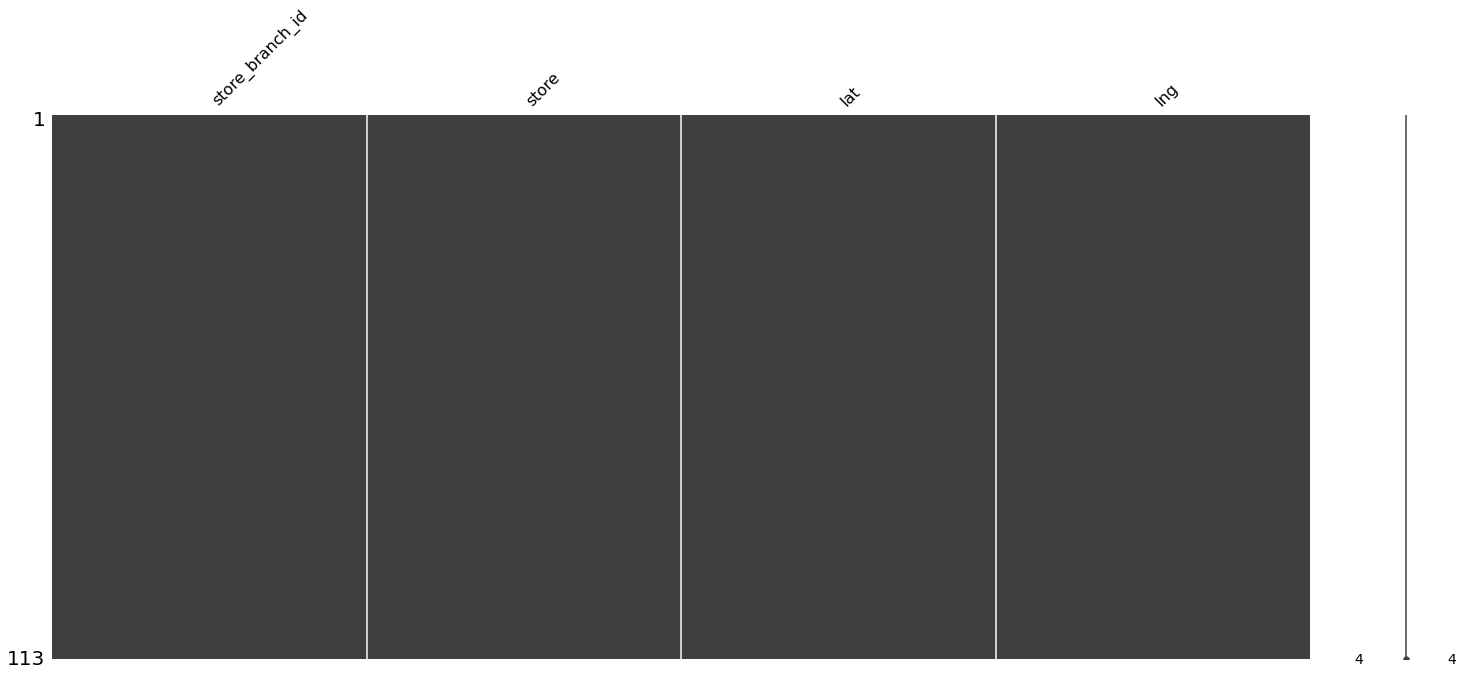

In [35]:
msgn.matrix(Orden_compra)
msgn.matrix(Orden_productos)
msgn.matrix(Recolector)
msgn.matrix(Tienda)

In [36]:
# Validación de eliminación de datos perdidos
print("Datos faltantes en Orden_compra:")
print(fun.missing_data(Orden_compra))
print("\nDatos faltantes en Orden_productos:")
print(fun.missing_data(Orden_productos))
print("\nDatos faltantes en Recolector:")
print(fun.missing_data(Recolector))
print("\nDatos faltantes en Tienda:")
print(fun.missing_data(Tienda))

Datos faltantes en Orden_compra:
                 Total missing  Percentage
order_id                     0         0.0
lat                          0         0.0
lng                          0         0.0
dow                          0         0.0
promised_time                0         0.0
actual_time                  0         0.0
on_demand                    0         0.0
picker_id                    0         0.0
driver_id                    0         0.0
store_branch_id              0         0.0
total_minutes                0         0.0

Datos faltantes en Orden_productos:
                  Total missing  Percentage
order_id                      0         0.0
product_id                    0         0.0
quantity                      0         0.0
quantity_foundkg              0         0.0
quantity_foundun              0         0.0

Datos faltantes en Recolector:
               Total missing  Percentage
shopper_id                 0         0.0
seniority                  0        

### **Consolidación de Datos**
Ahora los dataframes ya no contienen valores NaN y en la gráfica de missigno se aprecian clases balanceadas. Ahora utilizaremos el siguiente código para combinar las tablas anteriores en función de sus id's en común y conseguir un Dataframe común a las id´s:

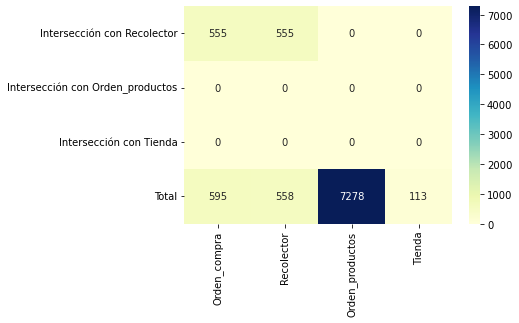

,Orden_compra,Recolector,Orden_productos,Tienda
Intersección con Recolector,555,555,0,0
Intersección con Orden_productos,0,0,0,0
Intersección con Tienda,0,0,0,0
Total,595,558,7278,113


In [37]:
# Creamos los conjuntos
set1 = set(Orden_compra['picker_id'].unique())
set2 = set(Recolector['shopper_id'].unique())
set3 = set(Orden_productos['order_id'].unique())
set4 = set(Tienda['store_branch_id'].unique())

# Crea un DataFrame con los datos de intersección
data = {
    'Orden_compra': [len(set1 & set2), len(set1 & set3), len(set1 & set4), len(set1)],
    'Recolector': [len(set2 & set1), len(set2 & set3), len(set2 & set4), len(set2)],
    'Orden_productos': [len(set3 & set1), len(set3 & set2), len(set3 & set4), len(set3)],
    'Tienda': [len(set4 & set1), len(set4 & set2), len(set4 & set3), len(set4)]
}

df = pd.DataFrame(data, index=['Intersección con Recolector', 'Intersección con Orden_productos', 'Intersección con Tienda', 'Total'])

# Crea un mapa de calor a partir del DataFrame
sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

df.head()

- 1.Orden_compra: De los 595 elementos únicos en el conjunto de Orden_compra, 555 de ellos también existen en el conjunto de Recolector. No hay intersección con los conjuntos de Orden_productos ni de Tienda.

- 2.Recolector: De los 558 elementos únicos en el conjunto de Recolector, todos ellos (555) también existen en el conjunto de Orden_compra. No hay intersección con los conjuntos de Orden_productos ni de Tienda.

- 3.Orden_productos: Hay 7278 elementos únicos en este conjunto y ninguno de ellos se cruza con los otros conjuntos (Orden_compra, Recolector, Tienda).

- 4.Tienda: Existen 113 elementos únicos en este conjunto, pero no hay intersección con los otros conjuntos (Orden_compra, Recolector, Orden_productos).

En general, la tabla indica que hay una considerable superposición entre los conjuntos de Orden_compra y Recolector, pero ninguna de estas dos categorías se cruza con Orden_productos o Tienda. Asimismo, Orden_productos y Tienda son conjuntos completamente únicos en sí mismos, sin ninguna intersección con los otros conjuntos.

Por lo tanto, parece que existe una relación significativa entre Orden_compra y Recolector, pero Orden_productos y Tienda están completamente separados de los otros conjuntos y entre sí.

In [38]:
# Unimos Orden_compras con Recolector en 'picker_id'
df_merge = pd.merge(Orden_compra, Recolector, left_on='picker_id', right_on='shopper_id', how='left')

# Unimos el resultado con Orden_productos en 'order_id'
df_merge = pd.merge(df_merge, Orden_productos, on='order_id', how='left')

# Finalmente, unimos con Tienda en 'store_branch_id'
df_merge = pd.merge(df_merge, Tienda, on='store_branch_id', how='left')

# Ahora df_merge es el dataframe resultante
print(df_merge.shape)
df_merge.head()

(108772, 24)


,order_id,lat_x,lng_x,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,...,picking_speed,accepted_rate,rating,product_id,quantity,quantity_foundkg,quantity_foundun,store,lat_y,lng_y
0,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,1.56,1.0,4.68,14af41ef1a7bbd715bf0375a0a1da65d,1.000,0.000,1.0,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440
1,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,1.56,1.0,4.68,4fec9ca5cd6b4d3e859f6d22b330a729,3.000,0.000,3.0,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440
2,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,1.56,1.0,4.68,0630d47440965509b0b3f80fd1b3578f,1.000,0.000,1.0,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440
3,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,1.56,1.0,4.68,76bfe407784870b3e38a1e957008c60e,1.000,0.000,1.0,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440
4,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,1.56,1.0,4.68,facffe9928299ad3e1ec73d2fa9eb4ba,0.402,0.415,0.0,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440


1.df_merge = pd.merge(Orden_compra, Recolector, left_on='picker_id', right_on='shopper_id', how='left'): Esta línea está combinando los DataFrames Orden_compra y Recolector. Está utilizando la columna picker_id de Orden_compra y la columna shopper_id de Recolector para hacer la combinación. La opción how='left' significa que se conservarán todas las filas del DataFrame de la izquierda (Orden_compra), incluso si no tienen una coincidencia en Recolector. Las filas del DataFrame de la derecha (Recolector) que no tienen una coincidencia en Orden_compra serán excluidas. El DataFrame resultante se almacena en df_merge.

2.df_merge = pd.merge(df_merge, Orden_productos, on='order_id', how='left'): Esta línea está tomando el DataFrame resultante de la primera combinación y lo está combinando con Orden_productos. Está utilizando la columna order_id para hacer la combinación. De nuevo, se conservarán todas las filas del DataFrame de la izquierda (en este caso, df_merge), incluso si no tienen una coincidencia en Orden_productos.

3.df_merge = pd.merge(df_merge, Tienda, on='store_branch_id', how='left'): Finalmente, esta línea está combinando el DataFrame resultante de las dos primeras combinaciones con el DataFrame Tienda. Está utilizando la columna store_branch_id para hacer la combinación. Todas las filas de df_merge serán conservadas, incluso si no tienen una coincidencia en Tienda.

Al final de este proceso, df_merge contendrá todas las filas de Orden_compra y la información correspondiente de Recolector, Orden_productos y Tienda. Esto puede facilitar el análisis de los datos al tener toda la información relevante en un solo lugar.

### **Revisión de NaN's con missigno en cada Dataframe df_merge**

Datos faltantes en df_merge
                  Total missing  Percentage
order_id                      0    0.000000
lat_x                         0    0.000000
lng_x                         0    0.000000
dow                           0    0.000000
promised_time                 0    0.000000
actual_time                   0    0.000000
on_demand                     0    0.000000
picker_id                     0    0.000000
driver_id                     0    0.000000
store_branch_id               0    0.000000
total_minutes                 0    0.000000
shopper_id                  860    0.790645
seniority                   860    0.790645
found_rate                  860    0.790645
picking_speed               860    0.790645
accepted_rate               860    0.790645
rating                      860    0.790645
product_id                   15    0.013790
quantity                     15    0.013790
quantity_foundkg             15    0.013790
quantity_foundun             15    0.013790
stor

<AxesSubplot:>

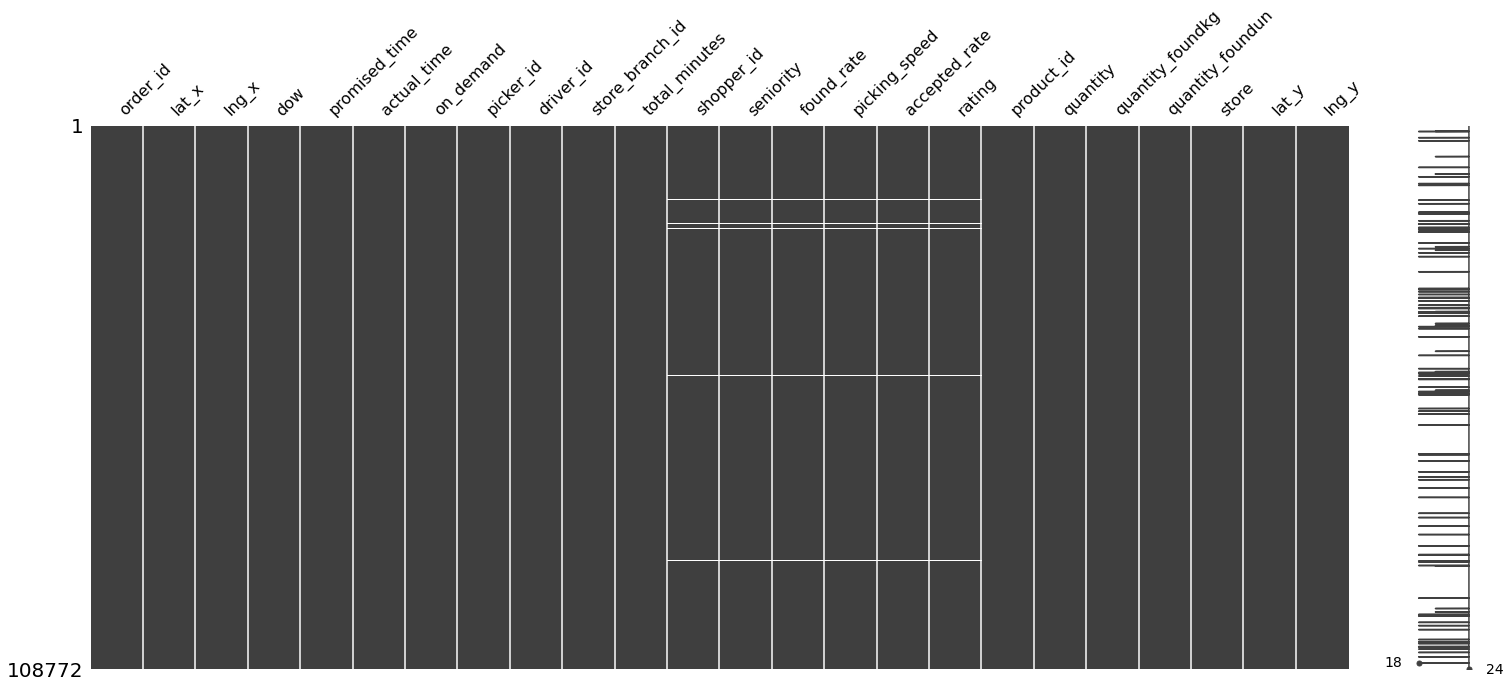

In [39]:
# Revisión del df_merge donde se revisa si dentro de la unión realizado vuelven a aparecer datos perdidos
print("Datos faltantes en df_merge")
print(fun.missing_data(df_merge))

msgn.matrix(df_merge)

<AxesSubplot:>

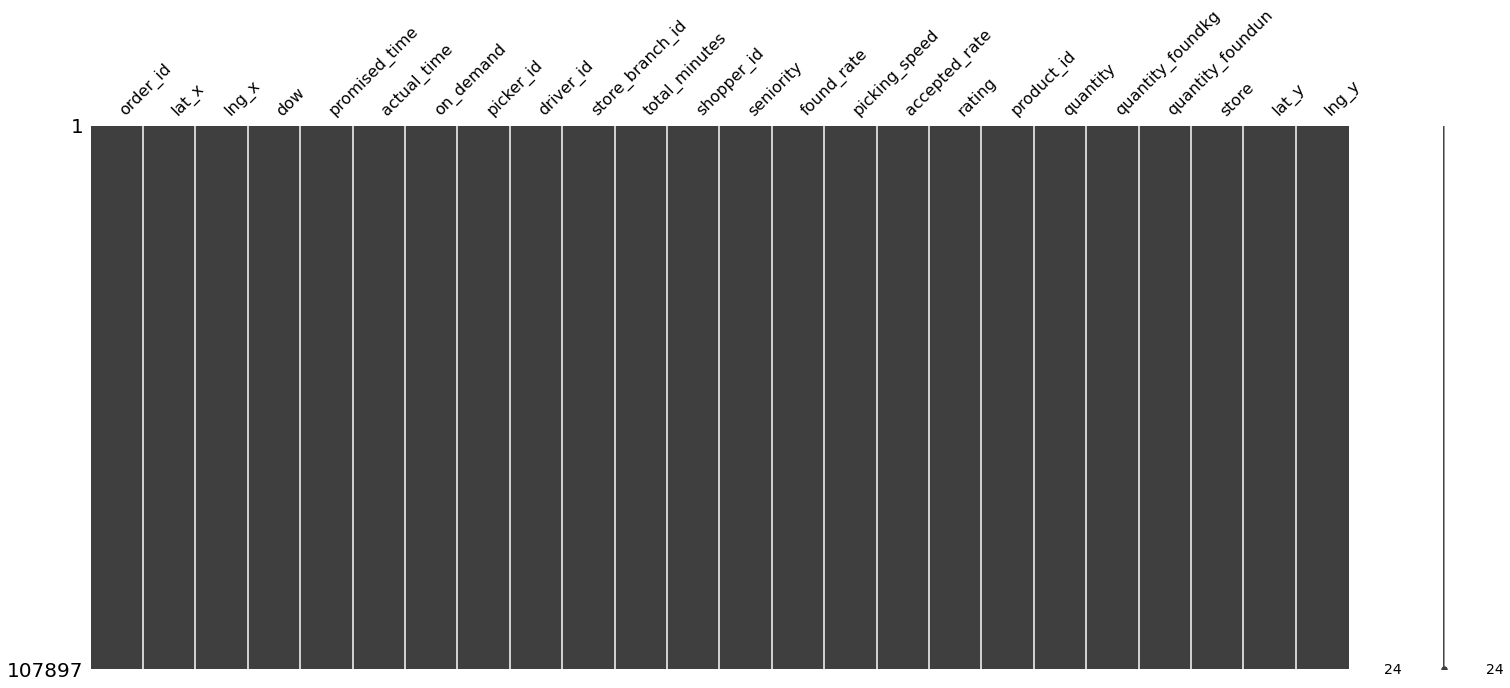

In [40]:
# Eliminar las filas con NaN 
df_merge = fun.drop_rows_with_nan(df_merge)

# Se visualiza nuevamente el gráfico de datos perdidos por eliminación
msgn.matrix(df_merge)

#### **Búsqueda Datos duplicados**

In [41]:
# Encontrar duplicados en todo el DataFrame
duplicates = df_merge.duplicated()

# Contar el número de duplicados
num_duplicates = duplicates.sum()

print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 2


In [42]:
# Ver las filas duplicadas
df_merge[duplicates]

,order_id,lat_x,lng_x,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,...,picking_speed,accepted_rate,rating,product_id,quantity,quantity_foundkg,quantity_foundun,store,lat_y,lng_y
75143,49b9b6966ce5dc4f3223657a861119eb,18.279.939.071.868.100,-10.030.433.576.696.500,1,1213.0,1197.983333,1,487c3b66ea24bc125178709f50f477fd,487c3b66ea24bc125178709f50f477fd,0302e4778cdaf296d9b69564e6296b6b,...,0.8,1.0,4.88,411696447d774157a9367a30ed7017b5,4.0,0.0,4.0,452ae015bf846e1d2932b7ea15720d64,18.292.089.299.586.700,-10.030.948.671.334.700
75144,49b9b6966ce5dc4f3223657a861119eb,18.279.939.071.868.100,-10.030.433.576.696.500,1,1213.0,1197.983333,1,487c3b66ea24bc125178709f50f477fd,487c3b66ea24bc125178709f50f477fd,0302e4778cdaf296d9b69564e6296b6b,...,0.8,1.0,4.88,f6125e21ce3f15ed5d43a6c5caed7048,4.0,0.0,4.0,452ae015bf846e1d2932b7ea15720d64,18.292.089.299.586.700,-10.030.948.671.334.700


In [43]:
# Para eliminar duplicados
df_merge = df_merge.drop_duplicates()

In [44]:
# Visualización de Dataframe y su información tipo de datos, valores distintos y NaN's
fun.dataframe_info(df_merge, "df_merge")

Dataset Name: df_merge
Column Name        Data Type  #Distinct  NaN Values
order_id           object     6435       0         
lat_x              object     6435       0         
lng_x              object     6435       0         
dow                int64      7          0         
promised_time      float64    787        0         
actual_time        float64    6028       0         
on_demand          int32      2          0         
picker_id          object     555        0         
driver_id          object     555        0         
store_branch_id    object     112        0         
total_minutes      object     6435       0         
shopper_id         object     555        0         
seniority          float64    4          0         
found_rate         float64    437        0         
picking_speed      float64    201        0         
accepted_rate      float64    21         0         
rating             float64    50         0         
product_id         object     23569      

In [45]:
# Visualización de Dataframe
df_merge.head()

,order_id,lat_x,lng_x,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,...,picking_speed,accepted_rate,rating,product_id,quantity,quantity_foundkg,quantity_foundun,store,lat_y,lng_y
0,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,1.56,1.0,4.68,14af41ef1a7bbd715bf0375a0a1da65d,1.000,0.000,1.0,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440
1,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,1.56,1.0,4.68,4fec9ca5cd6b4d3e859f6d22b330a729,3.000,0.000,3.0,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440
2,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,1.56,1.0,4.68,0630d47440965509b0b3f80fd1b3578f,1.000,0.000,1.0,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440
3,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,1.56,1.0,4.68,76bfe407784870b3e38a1e957008c60e,1.000,0.000,1.0,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440
4,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,1.56,1.0,4.68,facffe9928299ad3e1ec73d2fa9eb4ba,0.402,0.415,0.0,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440


#### **Recodificación de Latitu y Longitud**

In [46]:
# Cambiar tipo de datos a object y aplicar el formateo a las columnas lat y lng
df_merge['lat_x'] = df_merge['lat_x'].astype('object').apply(fun.formatear_coord_lat)
df_merge['lng_x'] = df_merge['lng_x'].astype('object').apply(fun.formatear_coord_long)
df_merge['lat_y'] = df_merge['lat_y'].astype('object').apply(fun.formatear_coord_lat)
df_merge['lng_y'] = df_merge['lng_y'].astype('object').apply(fun.formatear_coord_long)

In [47]:
# Convertir columnas a tipo float
df_merge['lat_x'] = df_merge['lat_x'].apply(fun.convertir_a_float)
df_merge['lng_x'] = df_merge['lng_x'].apply(fun.convertir_a_float)
df_merge['lat_y'] = df_merge['lat_y'].apply(fun.convertir_a_float)
df_merge['lng_y'] = df_merge['lng_y'].apply(fun.convertir_a_float)

# Calcular la distancia entre las coordenadas de latitud y longitud_  distancia en kilómetros
df_merge['distancia'] = df_merge.apply(lambda row: fun.calcular_distancia(row['lat_x'], row['lng_x'], row['lat_y'], row['lng_y']), axis=1)

# Visualización de df para revisar datos recodificados
df_merge.head()

,order_id,lat_x,lng_x,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,...,accepted_rate,rating,product_id,quantity,quantity_foundkg,quantity_foundun,store,lat_y,lng_y,distancia
0,6abd5e28d01b7c733fe37485294235dc,18.221141,-100.313914,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,1.0,4.68,14af41ef1a7bbd715bf0375a0a1da65d,1.000,0.000,1.0,60e4c4e1c1a8bc79123738227b9d0b08,18.231901,-10.030355,9411.859589
1,6abd5e28d01b7c733fe37485294235dc,18.221141,-100.313914,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,1.0,4.68,4fec9ca5cd6b4d3e859f6d22b330a729,3.000,0.000,3.0,60e4c4e1c1a8bc79123738227b9d0b08,18.231901,-10.030355,9411.859589
2,6abd5e28d01b7c733fe37485294235dc,18.221141,-100.313914,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,1.0,4.68,0630d47440965509b0b3f80fd1b3578f,1.000,0.000,1.0,60e4c4e1c1a8bc79123738227b9d0b08,18.231901,-10.030355,9411.859589
3,6abd5e28d01b7c733fe37485294235dc,18.221141,-100.313914,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,1.0,4.68,76bfe407784870b3e38a1e957008c60e,1.000,0.000,1.0,60e4c4e1c1a8bc79123738227b9d0b08,18.231901,-10.030355,9411.859589
4,6abd5e28d01b7c733fe37485294235dc,18.221141,-100.313914,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,1.0,4.68,facffe9928299ad3e1ec73d2fa9eb4ba,0.402,0.415,0.0,60e4c4e1c1a8bc79123738227b9d0b08,18.231901,-10.030355,9411.859589


#### **Recodificación de Total_minutes**

In [48]:
# Al calcular distancia en función de las latitudes y longitudes, las vamos a eliminar para simplificar el análisis posterior
col_drop = ['lat_x', 'lng_x', 'lat_y', 'lng_y']

# Eliminar las columnas del DataFrame
df_merge = df_merge.drop(col_drop, axis=1)

In [49]:
# Aplicar la función a la columna 'total_minutes'
df_merge['total_minutes'] = df_merge['total_minutes'].apply(fun.convertir_a_minutos)

In [50]:
fun.dataframe_info(df_merge, "df_merge")

Dataset Name: df_merge
Column Name        Data Type  #Distinct  NaN Values
order_id           object     6435       0         
dow                int64      7          0         
promised_time      float64    787        0         
actual_time        float64    6028       0         
on_demand          int32      2          0         
picker_id          object     555        0         
driver_id          object     555        0         
store_branch_id    object     112        0         
total_minutes      float64    6433       0         
shopper_id         object     555        0         
seniority          float64    4          0         
found_rate         float64    437        0         
picking_speed      float64    201        0         
accepted_rate      float64    21         0         
rating             float64    50         0         
product_id         object     23569      0         
quantity           float64    489        0         
quantity_foundkg   float64    1442       

<AxesSubplot:>

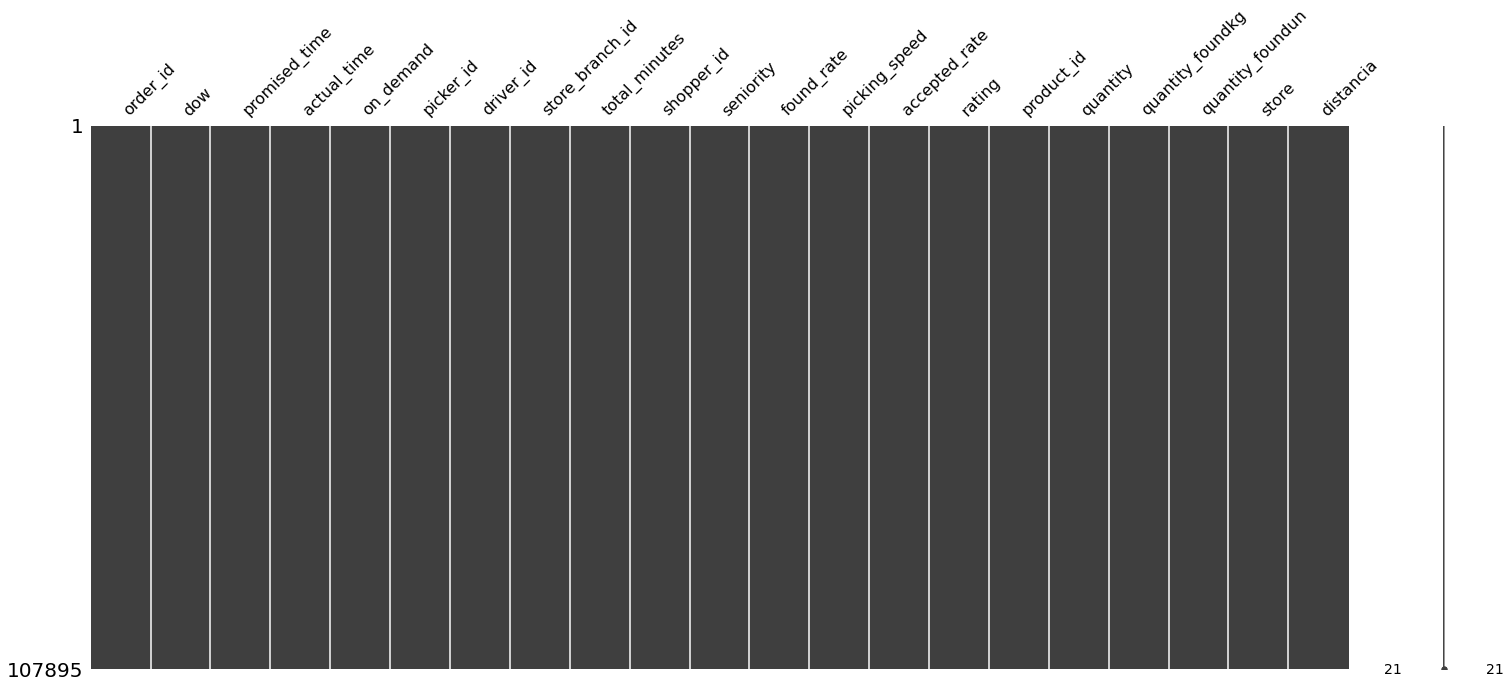

In [51]:
# Volver a validar Datos perdidos
msgn.matrix(df_merge)

### **Correlación entre Variables**

In [52]:
# Calculamos la matriz de correlación
corr_matrix = df_merge.corr()

# Mostramos la matriz de correlación
print(corr_matrix)

                       dow  promised_time  actual_time  on_demand  \
dow               1.000000      -0.042393    -0.050601   0.014790   
promised_time    -0.042393       1.000000     0.895100   0.111913   
actual_time      -0.050601       0.895100     1.000000   0.140930   
on_demand         0.014790       0.111913     0.140930   1.000000   
total_minutes    -0.013193      -0.022078     0.003666  -0.181546   
seniority        -0.009000       0.028990     0.022178  -0.018614   
found_rate       -0.024379      -0.070720    -0.088092  -0.068883   
picking_speed     0.016806       0.047214     0.096761   0.119842   
accepted_rate     0.014800      -0.023352    -0.028203  -0.060914   
rating            0.016573       0.024555     0.034754   0.033725   
quantity          0.015735      -0.008661    -0.008364   0.003351   
quantity_foundkg -0.019664      -0.019027    -0.022024  -0.028583   
quantity_foundun  0.019859      -0.003099    -0.003545   0.008848   
distancia         0.015781      -0

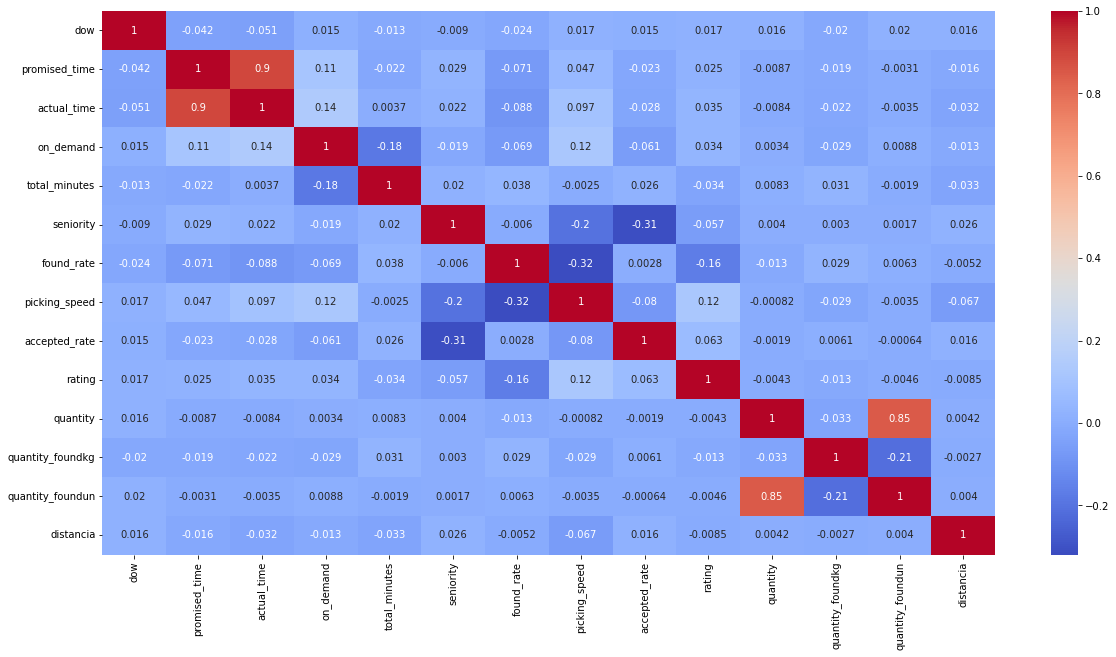

In [53]:
# Generamos el heatmap
plt.figure(figsize=(20, 10)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

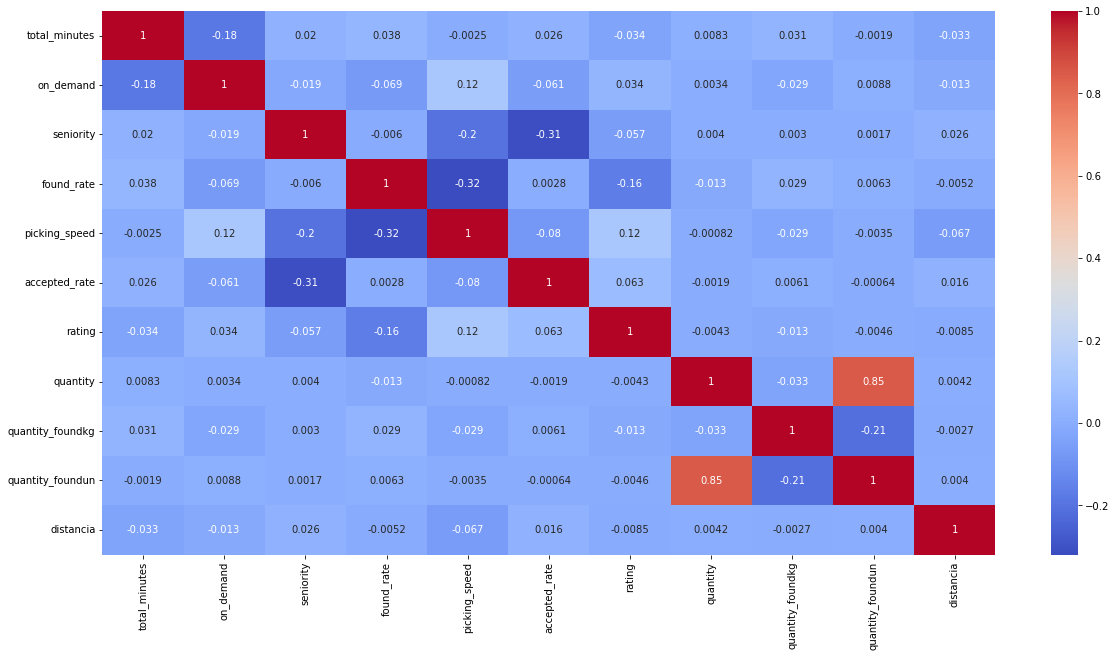

In [54]:
# Generamos el heatmap
def generate_heatmap(dataframe, variables):
    plt.figure(figsize=(20, 10)) 
    sns.heatmap(dataframe[variables].corr(), annot=True, cmap='coolwarm')
    plt.show()

# Ingresa el nombre de tu dataframe y la lista de variables en el siguiente código
nombre_dataframe = pd.DataFrame(df_merge)  
lista_variables = ['total_minutes','on_demand','seniority','found_rate','picking_speed','accepted_rate','rating','quantity','quantity_foundkg','quantity_foundun','distancia']

generate_heatmap(nombre_dataframe, lista_variables)
# Acá llevamos a un gráfico de correlación solo las variables que creemos que seran relevante en los modelos

#### Interpretacion Matriz de correlacion:

La matriz de correlación muestra las correlaciones entre diferentes variables en el conjunto de datos. Los valores de correlación varían entre -1 y 1, donde -1 indica una correlación negativa perfecta, 1 indica una correlación positiva perfecta y 0 indica que no hay correlación.

Algunas observaciones importantes de la matriz de correlación son:

- La variable "promised_time" tiene una correlación positiva moderada con "actual_time" (0.898) y una correlación positiva débil con "order_time" (0.876). Esto sugiere que hay una relación directa entre el tiempo prometido y el tiempo real de entrega de los pedidos, y que el tiempo de pedido también puede estar relacionado con el tiempo prometido.

- La variable "time_difference" muestra una correlación positiva moderada con "promised_time" (0.257) y una correlación negativa moderada con "delivered_on_promised" (-0.429). Esto indica que a medida que aumenta la diferencia entre el tiempo prometido y el tiempo real de entrega, es más probable que el pedido no se entregue dentro del tiempo prometido.

- La variable "total_minutes" tiene una correlación negativa débil con "on_demand" (-0.184) y una correlación negativa moderada con "delivered_on_promised" (-0.145). Esto sugiere que los pedidos realizados bajo demanda tienden a tener un menor tiempo total en comparación con los pedidos regulares, y que es más probable que los pedidos no se entreguen dentro del tiempo prometido si tienen un mayor tiempo total.

- La variable "seniority" muestra una correlación negativa débil con "picking_speed" (-0.200) y "accepted_rate" (-0.316). Esto indica que los repartidores con mayor antigüedad tienden a tener una velocidad de recolección más lenta y una tasa de aceptación más baja.

- La variable "found_rate" tiene una correlación negativa moderada con "picking_speed" (-0.320) y una correlación negativa débil con "accepted_rate" (-0.163). Esto sugiere que una velocidad de recolección más rápida está asociada con una tasa de encontrados más baja, y que una tasa de aceptación más baja también puede estar relacionada con una tasa de encontrados más baja.

- La variable "rating" muestra una correlación positiva débil con "picking_speed" (0.116) y una correlación positiva débil con "accepted_rate" (0.065). Esto indica que una mayor velocidad de recolección y una tasa de aceptación más alta pueden estar relacionadas con una calificación ligeramente más alta.

- Recordar que la correlación no implica causalidad. Estas correlaciones son solo indicativos de relaciones en los datos y no prueban que una característica cause cambios en otra. 
Habiendo dicho lo anterior, tomamos la decision de sacar las variables quantity (por estar correlacionada con quantity found), time promised por estar altamente correlacionada con la variable objetivo actual time y descartaremos lat y long de tanto las tiendas como los clientes debido a que tenemos refjlejada estas variables en distancia

In [55]:
# Visualización de Dataframe
df_merge.head()

,order_id,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes,shopper_id,...,found_rate,picking_speed,accepted_rate,rating,product_id,quantity,quantity_foundkg,quantity_foundun,store,distancia
0,6abd5e28d01b7c733fe37485294235dc,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,104.347683,09bb5bfe76adbb474dddbdd111a51623,...,0.8564,1.56,1.0,4.68,14af41ef1a7bbd715bf0375a0a1da65d,1.000,0.000,1.0,60e4c4e1c1a8bc79123738227b9d0b08,9411.859589
1,6abd5e28d01b7c733fe37485294235dc,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,104.347683,09bb5bfe76adbb474dddbdd111a51623,...,0.8564,1.56,1.0,4.68,4fec9ca5cd6b4d3e859f6d22b330a729,3.000,0.000,3.0,60e4c4e1c1a8bc79123738227b9d0b08,9411.859589
2,6abd5e28d01b7c733fe37485294235dc,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,104.347683,09bb5bfe76adbb474dddbdd111a51623,...,0.8564,1.56,1.0,4.68,0630d47440965509b0b3f80fd1b3578f,1.000,0.000,1.0,60e4c4e1c1a8bc79123738227b9d0b08,9411.859589
3,6abd5e28d01b7c733fe37485294235dc,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,104.347683,09bb5bfe76adbb474dddbdd111a51623,...,0.8564,1.56,1.0,4.68,76bfe407784870b3e38a1e957008c60e,1.000,0.000,1.0,60e4c4e1c1a8bc79123738227b9d0b08,9411.859589
4,6abd5e28d01b7c733fe37485294235dc,2,780.0,720.25,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,104.347683,09bb5bfe76adbb474dddbdd111a51623,...,0.8564,1.56,1.0,4.68,facffe9928299ad3e1ec73d2fa9eb4ba,0.402,0.415,0.0,60e4c4e1c1a8bc79123738227b9d0b08,9411.859589


### **Describe() método devuelve la descripción de los datos en el DataFrame**

In [56]:
# Visualización de columnas del df
df_merge.columns

Index(['order_id', 'dow', 'promised_time', 'actual_time', 'on_demand',
       'picker_id', 'driver_id', 'store_branch_id', 'total_minutes',
       'shopper_id', 'seniority', 'found_rate', 'picking_speed',
       'accepted_rate', 'rating', 'product_id', 'quantity', 'quantity_foundkg',
       'quantity_foundun', 'store', 'distancia'],
      dtype='object')

In [57]:
# Visualización de descripción de cada columna del df
df_merge.describe()

,dow,promised_time,actual_time,on_demand,total_minutes,seniority,found_rate,picking_speed,accepted_rate,rating,quantity,quantity_foundkg,quantity_foundun,distancia
count,107895.000000,107895.000000,107895.000000,107895.000000,107895.000000,107895.000000,107895.000000,107895.000000,107895.000000,107895.000000,107895.000000,107895.000000,107895.000000,107895.000000
mean,2.621614,945.591677,916.689898,0.297660,107.616851,1.852903,0.857616,1.779280,0.964395,4.786173,1.452222,0.193437,1.087282,3342.581283
std,1.698496,253.483899,251.099634,0.457231,63.704203,0.551939,0.034760,0.509035,0.059891,0.139510,1.625830,0.610845,1.603841,4454.265580
min,0.000000,0.000000,3.283333,0.000000,1.581567,0.000000,0.650900,0.800000,0.200000,3.200000,0.008000,0.000000,0.000000,0.038313
25%,1.000000,723.000000,702.083333,0.000000,79.199700,2.000000,0.839800,1.460000,0.960000,4.720000,1.000000,0.000000,0.000000,1.852105
50%,2.000000,900.000000,882.766667,0.000000,103.533633,2.000000,0.857300,1.630000,1.000000,4.800000,1.000000,0.000000,1.000000,4.169507
75%,4.000000,1166.000000,1143.750000,1.000000,131.618117,2.000000,0.880100,2.000000,1.000000,4.880000,1.140000,0.000000,1.000000,9410.474710
max,6.000000,1434.000000,1426.500000,1.000000,999.950000,3.000000,0.952900,4.660000,1.000000,5.000000,74.000000,107.039000,60.000000,10984.672418


#### **Creación de dataframe donde se guarda la estadística**

In [58]:
# Crear un DataFrame para guardar las estadísticas de cada variable numérica
df_stats = pd.DataFrame(columns=['Variable', 'Media', 'Mediana', 'Desv_est', 'Min', 'Max'])

# Obtener la lista de columnas numéricas en el DataFrame df_normalized
numerical_cols = df_merge.select_dtypes(include='number').columns.tolist()

# Iterar a través de cada columna numérica
for col in numerical_cols:
    # Calcular las estadísticas descriptivas
    mean = df_merge[col].mean()
    median = df_merge[col].median()
    std = df_merge[col].std()
    min_val = df_merge[col].min()
    max_val = df_merge[col].max()
    
    # Añadir las estadísticas al dataframe
    df_stats = df_stats.append({'Variable': col, 'Media': mean, 'Mediana': median, 
                                'Desv_est': std, 'Min': min_val, 'Max': max_val}, ignore_index=True)

# Imprimir el dataframe con las estadísticas
print(df_stats)

            Variable        Media     Mediana    Desv_est       Min  \
0                dow     2.621614         2.0    1.698496         0   
1      promised_time   945.591677       900.0  253.483899       0.0   
2        actual_time   916.689898  882.766667  251.099634  3.283333   
3          on_demand      0.29766         0.0    0.457231         0   
4      total_minutes   107.616851  103.533633   63.704203  1.581567   
5          seniority     1.852903         2.0    0.551939       0.0   
6         found_rate     0.857616      0.8573     0.03476    0.6509   
7      picking_speed      1.77928        1.63    0.509035       0.8   
8      accepted_rate     0.964395         1.0    0.059891       0.2   
9             rating     4.786173         4.8     0.13951       3.2   
10          quantity     1.452222         1.0     1.62583     0.008   
11  quantity_foundkg     0.193437         0.0    0.610845       0.0   
12  quantity_foundun     1.087282         1.0    1.603841       0.0   
13    

### **Gráfico variable Objetivo**

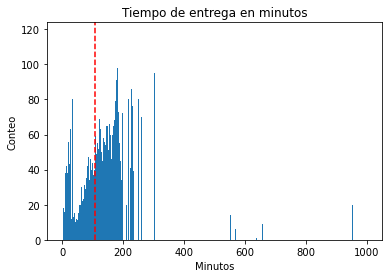

In [59]:
# Obtener el conteo de cada valor
conteo = {}
for tiempo in df_merge['total_minutes']:
    conteo[tiempo] = conteo.get(tiempo, 0) + 1

# Extraer los valores únicos y el conteo correspondiente
valores = sorted(conteo.keys())
conteo_valores = [conteo[valor] for valor in valores]

# Calcular la media de actual_time
media = np.mean(df_merge['total_minutes'])

# Crear el gráfico de barras
plt.bar(valores, conteo_valores)

# Agregar una línea vertical para la media
plt.axvline(x=media, color='red', linestyle='--', label='Media')

# Personalizar el gráfico
plt.xlabel('Minutos')
plt.ylabel('Conteo')
plt.title('Tiempo de entrega en minutos')

# Mostrar el gráfico
plt.show()

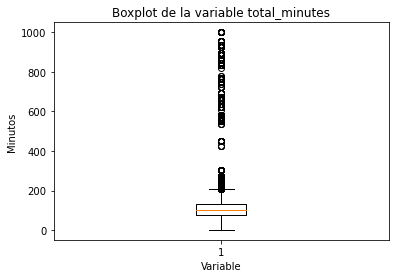

In [60]:
# Crear el gráfico de boxplot
plt.boxplot(df_merge['total_minutes'])

# Personalizar el gráfico
plt.xlabel('Variable')
plt.ylabel('Minutos')
plt.title('Boxplot de la variable total_minutes')

# Mostrar el gráfico
plt.show()

1) dow: Tiene una media de 2.62 y una mediana de 2. La desviación estándar de 1.70 sugiere una distribución moderada de los datos alrededor de la media. El valor mínimo es 0 y el máximo es 6, lo cual es consistente con la representación de los días de la semana en números.
2) promised_time: La media es 945.59 y la mediana es 900, lo que indica que la distribución podría estar ligeramente sesgada hacia la derecha. La desviación estándar es bastante alta (253.48), lo que sugiere una variación significativa en los datos.
3) actual_time: Tiene una media de 916.69 y una mediana de 882.77, lo que también puede indicar un sesgo a la derecha. La variabilidad también es alta en esta variable con una desviación estándar de 251.10.
4) on_demand: Esta variable categórica tiene una media de 0.30, lo que sugiere que una proporción significativa de los valores son 0. La desviación estándar de 0.46 confirma esto.
5) total_minutes: Tiene una media de 107.62 y una mediana de 103.53, lo que indica una distribución ligeramente sesgada hacia la derecha. La variabilidad es bastante alta con una desviación estándar de 63.70.
6) seniority: Esta variable tiene una media de 1.85 y una mediana de 2, lo que sugiere una distribución aproximadamente simétrica. La desviación estándar de 0.55 indica una variabilidad moderada.
7) found_rate: Con una media de 0.86 y una mediana de 0.86, los valores parecen estar agrupados cerca de la media. La desviación estándar es baja, lo que indica poca variabilidad en los datos.
8) picking_speed: Tiene una media de 1.78 y una mediana de 1.63, lo que indica una posible distribución sesgada a la derecha. La desviación estándar es moderada, lo que indica una variabilidad razonable.
9) accepted_rate: Con una media de 0.96 y una mediana de 1.0, la mayoría de los valores parecen estar cercanos a 1. La desviación estándar es baja, lo que indica poca variabilidad.
rating: Con una media de 4.79 y una mediana de 4.8, los valores parecen estar agrupados alrededor de la media. La desviación estándar es baja, lo que indica poca variabilidad.
10) quantity, quantity_foundkg, quantity_foundun: Estas tres variables tienen una media y una mediana muy diferentes, lo que indica un sesgo importante en la distribución de los datos. La desviación estándar es alta, lo que indica una alta variabilidad.
distancia: Tiene una media muy alta en comparación con la mediana, lo que sugiere una distribución sesgada a la derecha. La desviación estándar es extremadamente alta, lo que indica una variabilidad muy grande


En general, parecen existir ciertos sesgos y variabilidades en el conjunto de datos que podrían ser importantes para el análisis.

## **Gráficos de variables**

### **Gráficos de variables númericas del DF**

In [ ]:
# Obtener las columnas numéricas excluyendo 'on_demand'
numerical_cols = df_merge.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col != 'on_demand']

n = len(numerical_cols)
ncols = 3
nrows = np.ceil(n / ncols).astype(int)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

# Aplanar el array 2D de ejes en una lista 1D
axes = axes.ravel()

# Iterar a través de las columnas numéricas y crear un histograma para cada una
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df_merge, x=col, kde=True, ax=axes[i], color='navy')  # Cambiar el color a azul oscuro
    axes[i].axvline(df_merge[col].mean(), color='red', linestyle='dashed', linewidth=2)  # Línea roja para la media
    axes[i].set_title('Distribución de ' + col)
    axes[i].set_ylim(top=axes[i].get_ylim()[1] * 1.05)  # Ajustar la escala del eje y automáticamente

# Si hay menos gráficos que ejes, eliminar los ejes vacíos
if len(numerical_cols) < len(axes):
    for j in range(len(numerical_cols), len(axes)):
        fig.delaxes(axes[j])

fig.suptitle('Distribución de variables numéricas en el DataFrame df_merge', fontsize=16, y=1.02)  # Añadir el título del DataFrame

plt.tight_layout()  
plt.show()



In [ ]:
#Se crea gráfico solo para poder obtener una visualización mejor que la mostrada en el gráfico anterior de la variable
col = 'quantity'

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df_merge, x=col, kde=True, color='navy')  # Cambiar el color a azul oscuro
ax.axvline(df_merge[col].mean(), color='red', linestyle='dashed', linewidth=2)  # Línea roja para la media
ax.set_title('Distribución de ' + col)
ax.set_xlabel(col)
ax.set_ylabel('Count')
ax.set_ylim(0,1000) 

plt.tight_layout()
plt.show()


### **Test de Shapiro-Wilk**

In [ ]:
from scipy import stats

# Nombres de columnas numéricas
numeric_columns = ['promised_time', 'actual_time', 'on_demand', 'total_minutes', 
                   'seniority', 'found_rate', 'picking_speed', 'accepted_rate', 'rating', 'quantity', 
                   'quantity_foundkg', 'quantity_foundun', 'distancia']

# Realizar test de Shapiro-Wilk en cada columna numérica
for col in numeric_columns:
    data = df_merge[col].dropna()  # Remover NaNs
    statistic, p_value = stats.shapiro(data)
    print(f'{col}:')
    print(f'  Estadística de Shapiro-Wilk: {statistic}')
    print(f'  p-value: {p_value}\n')
    
    if p_value < 0.05:
        print("Los datos no provienen de una distribución normal")
    else:
        print("Los datos provienen de una distribución normal")

### **Gráficos de variables númericas Distribución logaritmizada**

#### **Comentarios Análisis de Variables Númericas**

En los gráficos podemos apreciar distribución simétrica (conocida como distribución normal o gaussiana), sesgada hacia la derecha (distribución con sesgo positivo) para "found_rate" y "rating", sesgada hacia la izquierda (distribución con sesgo negativo) para "picking_speed" y "quantity_found". No se aprecia una distribución bimodal. Sin embargo, se aprecia una distribución multimodal para "accepted_rate", "promised_time" y "dow". Y se aprecian diferencias grandes entre clases para "lng_y", "distancia", "buy_unit", "seniority". Además, hay fuertes diferencias en las magnitudes de los gráficos.

A continuación y en una segunda instancia, podemos decir a modo de interpretación general de estas estadísticas:

1) lat_x, lng_x, lat_y, lng_y: Estas son las coordenadas de latitud y longitud. No hay mucho que se pueda interpretar directamente a partir de sus estadísticas, ya que estas variables por lo general se utilizan para calcular distancias o para visualizar en un mapa. Pero puedes notar que existen valores mínimos muy cercanos a cero lo que podría indicar la presencia de datos incorrectos o errores.

2) dow (dias de la semana): La media está en torno a 2.6, lo que sugiere que la mayor parte de los datos se recopilaron a principios de semana (si 0 es domingo, 2.6 caería entre martes y miércoles).

3) promised_time y actual_time: Estas variables parecen estar relacionadas con el tiempo prometido y real de entrega. La media y la mediana son bastante cercanas, lo que sugiere una distribución simétrica. Sin embargo, hay que tener en cuenta que el valor mínimo para actual_time es de 452.5, que podría considerarse un valor atípico en algunos contextos.

3) on_demand: Esta variable parece ser binaria (0 y 1). La media está cerca de 0.3, lo que indica que alrededor del 30% de los datos están marcados como "on_demand".

4) total_minutes, time_difference, order_time: Estas variables parecen estar relacionadas con el tiempo de procesamiento del pedido. Hay algunas variaciones importantes aquí, como se puede ver en la desviación estándar. Algunas de las diferencias pueden ser negativas, lo que sugiere que algunos pedidos se entregaron despues de lo prometido.

5) delivered_on_promised: Variable binaria, con una media muy cerca de 1, lo que indica que la mayoría de las entregas se realizan a tiempo.

5) seniority, found_rate, picking_speed, accepted_rate, rating: Estas variables podrían estar relacionadas con el rendimiento del repartidor. Parece que la mayoría de los repartidores tienen una alta tasa de aceptación y una alta calificación.

6) quantity, quantity_found, buy_unit: Estas variables parecen estar relacionadas con la cantidad de productos pedidos y encontrados. Podría haber algunas discrepancias aquí, como se ve en las diferencias entre las medias de estas variables. Estas discrepancias de explican por las diferencias en las escalas de KG y UN con la cual se procesa buy unit. Se trato de hacer la separacion de esta variable, sin embargo al tratar de hacer un merge, llegamos a un df vacio.

7) distancia: Esta variable parece representar la distancia entre dos puntos (entre el local y el cliente). La media es mucho mayor que la mediana, lo que sugiere una distribución con cola larga hacia la derecha.

Estas son solo algunas interpretaciones generales basadas en las estadísticas proporcionadas.

In [ ]:
# Obtener las columnas numéricas excluyendo 'on_demand'
numerical_cols = df_merge.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col != 'on_demand']

# Aplicar logaritmo a las columnas numéricas
df_log = np.log1p(df_merge[numerical_cols])

# Calcular el número de filas y columnas para el diseño del subplot
n = len(numerical_cols)
ncols = 3
nrows = np.ceil(n / ncols).astype(int)

# Crear la figura y los ejes de los subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

# Aplanar el array 2D de ejes en una lista 1D
axes = axes.ravel()

# Iterar a través de las columnas numéricas logaritmizadas y crear un histograma para cada una
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df_log, x=col, kde=True, ax=axes[i])
    axes[i].axvline(df_log[col].mean(), color='red', linestyle='dashed', linewidth=2)  # Línea roja para la media
    axes[i].set_title('Distribución logaritmizada de ' + col)
    axes[i].autoscale(enable=True, axis='y')  # Ajustar la escala del eje y automáticamente

# Si hay menos gráficos que ejes, eliminar los ejes vacíos
if len(numerical_cols) < len(axes):
    for j in range(len(numerical_cols), len(axes)):
        fig.delaxes(axes[j])

fig.suptitle('Distribución logaritmizada de variables numéricas en el DataFrame df_merge', fontsize=16, y=1.02)  # Añadir el título del DataFrame

plt.tight_layout()  
plt.show()

#### Se aprecia que al aplicar logaritmo disminuye el sesgo de 'total_minutes' y 'found_rate', sin embargo, por practicidad no aplicamos logaritmo al momento de utilizar los datos en los modelos porque hay mucho 0 y log(0)=inf. Por lo que no convertimos los datos para ingresar a los modelos.

In [ ]:
#Gráfico para las variables on_demand, dow y seniority

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(data=df_merge, x='on_demand', ax=axes[0])
axes[0].set_title('Distribución de on_demand')
axes[0].set_xlabel('on_demand')
axes[0].set_ylabel('Count')

sns.countplot(data=df_merge, x='seniority', ax=axes[1])
axes[1].set_title('Distribución de seniority')
axes[1].set_xlabel('seniority')
axes[1].set_ylabel('Count')

sns.countplot(data=df_merge, x='dow', ax=axes[2])
axes[2].set_title('Distribución de dow')
axes[2].set_xlabel('dow')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


### **Gráficos de variables categóricas del DF**

In [ ]:
categorical_cols = df_merge.select_dtypes(include=['object']).columns
n = len(categorical_cols)
ncols = 3
nrows = np.ceil(n / ncols).astype(int)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*6))

# Aplanar el array 2D de ejes en una lista 1D
axes = axes.ravel()

# Iterar a través de las columnas categóricas y crear un gráfico de barras para cada una
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_merge, y=col, ax=axes[i])
    axes[i].set_title('Distribución de ' + col)
    axes[i].set_ylabel('')  # Eliminar etiqueta del eje y
    axes[i].set_xlabel('')  # Eliminar etiqueta del eje x
    axes[i].tick_params(axis='both', which='both', length=0)  # Ocultar marcas en ambos ejes

    # Ocultar eje y
    axes[i].spines['left'].set_visible(False)
    axes[i].get_yaxis().set_visible(False)

    # Ajustar el espacio entre los gráficos
    axes[i].margins(x=0.1)

# Si hay menos gráficos que ejes, eliminar los ejes vacíos
if len(categorical_cols) < len(axes):
    for j in range(len(categorical_cols), len(axes)):
        fig.delaxes(axes[j]) 

plt.tight_layout()  
plt.show()


### Distribución de variables categóricas donde se muestra los primerosn 20 valores

In [ ]:
# Obtener las columnas categóricas
categorical_cols = df_merge.select_dtypes(include=['object']).columns
numerical_cols = [col for col in numerical_cols if col != 'on_demand']

n = len(categorical_cols)
ncols = 3
nrows = np.ceil(n / ncols).astype(int)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*6))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    # Calcular la cuenta de valores y ordenar de mayor a menor
    counts = df_merge[col].value_counts().sort_values(ascending=False)

    # Limitar a los primeros 20 valores
    counts = counts[:20]

    sns.barplot(x=counts.values, y=counts.index, ax=axes[i], orient='h')
    axes[i].set_title('Distribución de ' + col)
    axes[i].set_ylabel('')  
    axes[i].set_xlabel('')  
    axes[i].tick_params(axis='both', which='both', length=0)  

    #axes[i].spines['left'].set_visible(False)
    #axes[i].get_yaxis().set_visible(False)

    axes[i].margins(x=0.1)

if len(categorical_cols) < len(axes):
    for j in range(len(categorical_cols), len(axes)):
        fig.delaxes(axes[j]) 

plt.tight_layout()  
plt.show()


In [ ]:
# Visualización de información de variables categóricas
fun.categorical_report_summary(df_merge, categorical_cols)

#### **Comentarios análisis de variables categóricas**
- No hay valores nulos en ninguna de las columnas.
- Los ID de order_id son en su mayoría únicos con algunas repeticiones.
- Los IDs de picker_id, driver_id y shopper_id tienen una frecuencia alta para ciertos valores. Puede ser interesante investigar más a fondo estos casos.
- Hay un número muy alto de productos únicos en product_id, lo que es esperable en un conjunto de datos de transacciones de compras.
- La columna store muestra que hay algunas tiendas que tienen muchas más transacciones que otras.

### **Gráficos de Distribución**

In [ ]:
# Graficos de correlaciones en grillas de 3x3
variables_independientes = df_merge.drop('total_minutes', axis=1)
n = len(variables_independientes.columns)
ncols = 3
nrows = np.ceil(n / ncols).astype(int)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

# Aplanar el array 2D de ejes en una lista 1D
axes = axes.ravel()

# Graficar la dispersión para cada variable independiente
for i, column in enumerate(variables_independientes.columns):
    axes[i].scatter(variables_independientes[column], df_merge['total_minutes'], s=10, alpha=0.8, edgecolors='b')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Variable Objetivo (Timestamp)')
    axes[i].set_title(f'Distribución entre {column} y Variable Objetivo')

# Si hay menos gráficos que ejes, eliminar los ejes vacíos
if len(variables_independientes.columns) < len(axes):
    for j in range(len(variables_independientes.columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### En los gráficos de scatter plot o gráfico de dispersión no se aprecian aparentemente relaciones de correlación.

## **Outliers**
A continuacion procedermos a ver los outliers que tenemos en las variables numericas, de manera de evaluar si es que eventualmente las dejamos o no.

In [ ]:
numeric_cols = df_merge.select_dtypes(include=[np.number]).columns.tolist()
object_cols = df_merge.select_dtypes(include=[object]).columns.tolist()

print("Numeric Columns: ", numeric_cols)
print("Object Columns: ", object_cols)

In [ ]:
fun.dataframe_info(df_merge, "df_merge")

In [ ]:
# Calcular el número de filas necesarias en la grilla de gráficos
n = len(numeric_cols)
ncols = 3
nrows = math.ceil(n / ncols)

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))

# Aplanar la lista de ejes para facilitar su iteración
ax = ax.ravel()

for i, num_var in enumerate(numeric_cols):
    sns.boxplot(y=df_merge[num_var], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(num_var), fontsize=10)
    ax[i].set_xlabel(num_var, fontsize=8)

# Eliminar gráficos vacíos
if n % ncols != 0:
    for j in range(n, nrows*ncols):
        fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

#### **Comentarios de Outliers**
De los boxplots podemos decir que tenemos outliers practicamente en todas las variables. Podemos señalar que la mediana para dow, found_rate, picking_speed, y rating se posiciona de manera bastante pareja, sin embargo para las otras varibales podemos ver una mediana algo sesgada en total_minutes, accepted_rate, quantity_foundun y quantity_foundkg y distancia.

In [ ]:
# Función que permite calcular los outliers de cada columna del dataframe
fun.calculate_outliers(df_merge)

________________________________________________________________________________________________

# **Modelos:**

Como comentamos al inicio del trabajo, evaluaremos distintos modelos para poder predecir la variable 'total_minutes' la cual es nuestra variable objetivo. 
Para ello utilizaremos el siguiente set de modelos utilizando el análisis de importancia para ver las características más influyentes por cada modelo e ir depurando en un modelo que dependa de menos variables y así de identificar las más importantes e influyentes del modelo.

los modelos son:

- Random Forest
- Árboles de decision
- GAM
- Regresion Lineal

### **Primer análisis con el fin de ir reduciendo en base a su importancia las variables relevantes en la predicción**

- Prediciendo total_minutes: ¿Por qué predecir total_minutes? porque ésto predice el tiempo total que tarda una entrega.
- También dejaremos fuera del entrenamiento las siguientes columnas, algunas como 'dow', 'promised_time' y 'actual_time' que pertenecen al modelo anterior y por lo tanto, no son de utilidad para entrenar un modelo, para predecir 'total_minutes'.
- Comenzaremos depurando la parte relacionada las variables categóricas, que en teoría no deberían ser relevantes e influyentes en algún modelo al ser id's de identificación y autogeneradas probablemente, para ésto utilizaremos one hot encoding a las varaibles categóricas con el fin de implementar un modelo basado en importancias el cual nos permita descartar con seguridad las id´s y demostrar su irrelevancia en el vector a predecir.

### Análisis que incluye las características categóricas con one hot encoding aplicado:

In [ ]:
col_drop = ['order_id', 'product_id', 'quantity', 'promised_time', 'dow', 'actual_time']
df_merge_clean = df_merge.drop(col_drop, axis=1)

In [ ]:
# One hot encoding para las id's!
columnas = ['picker_id', 'driver_id', 'store_branch_id', 'store', 'shopper_id']

# Aplica One Hot Encoding a las columnas
df_encoded = pd.get_dummies(df_merge_clean, columns=columnas)

In [ ]:
df_encoded

# Modelo 1:
## Random Forest:

In [ ]:
# Segundo modelo a probar con las columnas object procesadas con one hot encoding !
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
import pandas as pd
import numpy as np

# Crear matrices de características y variable objetivo
X = df_encoded.drop(['total_minutes'], axis=1)
y = df_encoded['total_minutes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crear el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular el error cuadrático medio, r2 y error mediano absoluto
mse = mean_squared_error(y_test, predictions)
mae = median_absolute_error(y_test, predictions)
r2_ = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2_}')

# Importancia de las características
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)

# Modelo 2:
## Decision Tree:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
import pandas as pd
import numpy as np

# Crear matrices de características y variable objetivo
X = df_encoded.drop(['total_minutes'], axis=1)
y = df_encoded['total_minutes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crear el modelo
model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular el error cuadrático medio, r2 y error mediano absoluto
mse = mean_squared_error(y_test, predictions)
mae = median_absolute_error(y_test, predictions)
r2_ = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2_}')

# Importancia de las características
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)

# Modelo 3:
## Regresión Lineal

In [ ]:
# Crear matrices de características y variable objetivo
X = df_encoded.drop(['total_minutes'], axis=1)
y = df_encoded['total_minutes']

# Agregar constante a X para el intercepto
X = sm.add_constant(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crear el modelo usando statsmodels en lugar de scikit-learn
modelRL = sm.OLS(y_train, X_train)

# Ajustar el modelo
results = modelRL.fit()

# Imprimir el resumen estadístico
print(results.summary())

# Hacer predicciones en el conjunto de prueba
predictions = results.predict(X_test)

# Calcular el error cuadrático medio, el error absoluto medio y el coeficiente de determinación
mse = mean_squared_error(y_test, predictions)
mae = median_absolute_error(y_test, predictions)
r2_ = r2_score(y_test, predictions)

# Se agregan las predicciones como una columna nueva en el dataframe de prueba
X_test['predicted_time_RL'] = predictions

# Creamos una columna
X_test['total_minutes'] = df_merge['total_minutes']

# Imprimir el dataframe X_test con las predicciones y los valores reales
X_test.head()

# Modelo 4:
## GAM

In [ ]:
from pygam import LinearGAM, s, f
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.inspection import permutation_importance

# Crear matrices de características y variable objetivo
X = df_encoded.drop(['total_minutes'], axis=1)
y = df_encoded['total_minutes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crear los términos para el modelo GAM
# Aquí estoy asumiendo que todas tus variables son continuas. Si tienes variables categóricas, deberías usar f() en lugar de s().
terms = sum((s(i) for i in range(X_train.shape[1])), s(0))  # Los términos se suman usando el operador +

# Crear el modelo
gam = LinearGAM(terms)

# Ajustar el modelo a los datos de entrenamiento
gam.fit(X_train.values, y_train.values)

# Hacer predicciones en el conjunto de prueba
predictions = gam.predict(X_test)

# Calcular el error cuadrático medio, el error absoluto medio y el coeficiente de determinación
mse = mean_squared_error(y_test, predictions)
mae = median_absolute_error(y_test, predictions)
r2_ = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2_}')

# Calcular la importancia de permutación
results = permutation_importance(gam, X_test, y_test, scoring='neg_mean_squared_error')

# Obtener la importancia de permutación
importance = results.importances_mean

# Crear un DataFrame para visualizar los resultados
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importance})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

print(feature_importances)

# Crear el gráfico de barras de las feature_importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances GAM')
plt.tight_layout()
plt.show()

# Se agregan las predicciones como una columna nueva en el dataframe de prueba
X_test['predicted_total_minutesGAM'] = predictions

# Creamos una columna 'actual_time_hhmmss'
X_test['total_minutes'] = df_merge['total_minutes']

# Imprimir el dataframe X_test con las predicciones y los valores reales
X_test

## Comentarios
Dados los resultados anteriores con las variables categóricas, se opta por trabajar solamente con las numéricas descartando toda importancia de las variables categóricas en la predicción del vector objetivo, aunque sin embargo, para Random forest haya dado relativamente un buen modelo donde en el caso de las métricas que has proporcionado, se observa un MSE muy bajo (cerca de cero), lo que indica que las predicciones del modelo tienen una diferencia muy pequeña con los valores reales. El MAE también es extremadamente bajo, cercano a cero, lo que sugiere que las predicciones tienen una diferencia promedio muy pequeña en términos absolutos. Además, el valor de R^2 es alto (aproximadamente 0.993), lo que indica que el modelo es capaz de explicar aproximadamente el 99.3% de la variabilidad de los datos.

### Y Para Decision Tree tenemos:
MSE (Mean Squared Error): El valor de MSE es 24.124339506008425. Esto indica que, en promedio, las predicciones del modelo tienen una diferencia cuadrática de aproximadamente 24.12 unidades con respecto a los valores reales. Un MSE más bajo significa que las predicciones son más cercanas a los valores reales, por lo que este valor indica que el modelo tiene un buen ajuste y las predicciones son precisas.

MAE (Mean Absolute Error): El valor de MAE es 7.105427357601002e-15. Este valor es extremadamente bajo, cercano a cero. Indica que, en promedio, las predicciones del modelo tienen una diferencia absoluta muy pequeña con respecto a los valores reales. Un MAE tan bajo sugiere que las predicciones son prácticamente idénticas a los valores reales, lo cual es un indicador de un ajuste excelente del modelo.

R^2 (R-squared): El coeficiente de determinación tiene un valor de 0.9941622556468048, lo que indica que aproximadamente el 99.4% de la variabilidad de los datos se explica por el modelo. Un valor de R^2 cercano a 1 es deseable, ya que indica que el modelo es capaz de capturar la variabilidad de los datos de manera efectiva.

### Y Para la regresión lineal tenemos:

R-cuadrado (R-squared): El coeficiente de determinación R-cuadrado indica la proporción de la variabilidad total de la variable dependiente (total_minutes) que se explica por el modelo. En este caso, el valor de R-cuadrado es 0.251, lo que significa que alrededor del 25.1% de la variabilidad en total_minutes se explica por las variables independientes incluidas en el modelo.

R-cuadrado ajustado (Adj. R-squared): El R-cuadrado ajustado es similar al R-cuadrado, pero tiene en cuenta la cantidad de variables independientes en el modelo y los grados de libertad. En este caso, el valor del R-cuadrado ajustado es 0.243.

Estadístico F y Prob (F-statistic): El estadístico F y su valor p asociado se utilizan para evaluar si el modelo en su conjunto es significativo. En este caso, el valor del estadístico F es 30.28 y el valor p asociado es 0.00. Un valor p bajo (menor que el nivel de significancia elegido) indica que el modelo es significativo en su conjunto.

Log-Likelihood (Log-Likelihood): El log-likelihood es una medida de la bondad de ajuste del modelo. Un log-likelihood más alto indica un mejor ajuste del modelo a los datos observados. En este caso, el valor del log-likelihood es -3.9209e+05.

No. Observations (Número de observaciones): Indica el número de observaciones utilizadas en el análisis de regresión. En este caso, se utilizaron 72,289 observaciones.

AIC y BIC: El AIC (Akaike Information Criterion) y el BIC (Bayesian Information Criterion) son criterios utilizados para comparar y seleccionar entre modelos alternativos. Estos criterios tienen en cuenta tanto la bondad de ajuste del modelo como la complejidad del mismo. En este caso, el valor del AIC es 7.858e+05 y el valor del BIC es 7.931e+05.

Df Residuals y Df Model: Estos campos indican los grados de libertad de los residuos (Df Residuals) y del modelo (Df Model). En este caso, hay 71,495 grados de libertad de los residuos y 793 grados de libertad del modelo.

Covariance Type (Tipo de covarianza): Indica el tipo de estimación de la matriz de covarianza utilizada en el análisis. En este caso, se utilizó el tipo de covarianza no robusto.

En resumen, estos resultados indican que el modelo de regresión tiene cierto poder predictivo, con un R-cuadrado de alrededor del 25.1%.

# Modelos con características numéricas:

In [ ]:
# Lista de columnas a eliminar
col_drop = ['promised_time', 'order_id', 'picker_id', 'driver_id', 'store_branch_id', 'shopper_id', 'product_id', 
            'store','dow', 'actual_time', 'total_minutes']

# Modelo 1:
## Random Forest

In [ ]:
# Crear matrices de características y variable objetivo
X = df_merge.drop(col_drop, axis=1)
y = df_merge['total_minutes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crear el modelo
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
modelRF.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = modelRF.predict(X_test)

# Calcular el error cuadrático medio, r2 y error mediano absoluto
mse = mean_squared_error(y_test, predictions)
mae = median_absolute_error(y_test, predictions)
r2_ = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2_}')

# Importancia de las características
importances = modelRF.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)

# Crear el gráfico de barras de las feature_importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances Random Forest')
plt.tight_layout()
plt.show()

# Se agregan las predicciones como una columna nueva en el dataframe de prueba
X_test['predicted_timeRF'] = predictions

# Creamos una columna 
X_test['total_minutes'] = df_merge['total_minutes']

# Imprimir el dataframe X_test con las predicciones y los valores reales
X_test

# Modelo 2:
## Desicion Tree

In [ ]:
# Crear matrices de características y variable objetivo
X = df_merge.drop(col_drop, axis=1)
y = df_merge['total_minutes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crear el modelo
modelDT = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
modelDT.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = modelDT.predict(X_test)

# Calcular el error cuadrático medio, r2 y error mediano absoluto
mse = mean_squared_error(y_test, predictions)
mae = median_absolute_error(y_test, predictions)
r2_ = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2_}')

# Importancia de las características
importances = modelDT.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)

# Crear el gráfico de barras de las feature_importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances Árbol de decisón')
plt.tight_layout()
plt.show()

# Se agregan las predicciones como una columna nueva en el dataframe de prueba
X_test['predicted_timeDT'] = predictions

# Creamos una columna 
X_test['total_minutes'] = df_merge['total_minutes']

# Imprimir el dataframe X_test con las predicciones y los valores reales
X_test.head()

# Modelo 3:
## GAM

In [ ]:
from pygam import LinearGAM, s, f
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.inspection import permutation_importance

# Crear matrices de características y variable objetivo
X = df_merge.drop(col_drop, axis=1)
y = df_merge['total_minutes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crear los términos para el modelo GAM
# Aquí estoy asumiendo que todas tus variables son continuas. Si tienes variables categóricas, deberías usar f() en lugar de s().
terms = sum((s(i) for i in range(X_train.shape[1])), s(0))  # Los términos se suman usando el operador +

# Crear el modelo
gam = LinearGAM(terms)

# Ajustar el modelo a los datos de entrenamiento
gam.fit(X_train.values, y_train.values)

# Hacer predicciones en el conjunto de prueba
predictions = gam.predict(X_test)

# Calcular el error cuadrático medio, el error absoluto medio y el coeficiente de determinación
mse = mean_squared_error(y_test, predictions)
mae = median_absolute_error(y_test, predictions)
r2_ = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2_}')

# Calcular la importancia de permutación
results = permutation_importance(gam, X_test, y_test, scoring='neg_mean_squared_error')

# Obtener la importancia de permutación
importance = results.importances_mean

# Crear un DataFrame para visualizar los resultados
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importance})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

print(feature_importances)

# Crear el gráfico de barras de las feature_importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances GAM')
plt.tight_layout()
plt.show()

# Se agregan las predicciones como una columna nueva en el dataframe de prueba
X_test['predicted_timeGAM'] = predictions

# Creamos una columna 'actual_time_hhmmss'
X_test['total_minutes'] = df_merge['total_minutes']

# Imprimir el dataframe X_test con las predicciones y los valores reales
X_test

# Modelo 4:
##  Regresión Lineal

In [ ]:
# Crear matrices de características y variable objetivo
X = df_merge.drop(col_drop, axis=1)
y = df_merge['total_minutes']

# Agregar constante a X para el intercepto
X = sm.add_constant(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crear el modelo usando statsmodels en lugar de scikit-learn
modelRL = sm.OLS(y_train, X_train)

# Ajustar el modelo
results = modelRL.fit()

# Imprimir el resumen estadístico
print(results.summary())

# Hacer predicciones en el conjunto de prueba
predictions = results.predict(X_test)

# Calcular el error cuadrático medio, el error absoluto medio y el coeficiente de determinación
mse = mean_squared_error(y_test, predictions)
mae = median_absolute_error(y_test, predictions)
r2_ = r2_score(y_test, predictions)

# Se agregan las predicciones como una columna nueva en el dataframe de prueba
X_test['predicted_time_RL'] = predictions

# Creamos una columna
X_test['total_minutes'] = df_merge['total_minutes']

# Imprimir el dataframe X_test con las predicciones y los valores reales
X_test.head()

### Comentarios:

Al analizar los resultados del modelo de regresión lineal, se pueden observar varias cosas:

El coeficiente de determinación (R-squared) es de 0.041, lo que indica que solo el 4.1% de la variabilidad de la variable objetivo (total_minutes) se explica por las variables independientes incluidas en el modelo. Esto sugiere que el modelo no es capaz de explicar de manera satisfactoria la variabilidad en la variable objetivo.

El estadístico F y su valor p asociado indican que el modelo en su conjunto es estadísticamente significativo, lo que significa que al menos una de las variables independientes tiene un efecto significativo en la variable objetivo.

Al examinar los coeficientes de las variables independientes, se pueden identificar algunas variables que parecen tener un impacto significativo en la variable objetivo. Por ejemplo, las variables "on_demand", "seniority", "found_rate", "picking_speed", "accepted_rate" y "distancia" tienen coeficientes con valores absolutos significativos y p-valores cercanos a cero. Esto sugiere que estas variables están relacionadas de manera significativa con la variable objetivo.

Por otro lado, las variables "quantity_foundun" tienen un p-valor mayor a 0.05, lo que indica que no hay evidencia suficiente para afirmar que estas variables tienen un impacto significativo en la variable objetivo.

Es importante tener en cuenta que la presencia de variables irrelevantes o variables con p-valores altos no necesariamente indica que el modelo sea malo en su totalidad. Sin embargo, es posible que estas variables irrelevantes estén introduciendo ruido o multicolinealidad en el modelo, lo que puede afectar su rendimiento y precisión.

En resumen, el modelo de regresión lineal mostrado tiene un bajo coeficiente de determinación y algunas variables irrelevantes. Esto sugiere que el modelo puede no ser adecuado para explicar la variabilidad en la variable objetivo. Sería recomendable realizar una revisión más exhaustiva del modelo, considerar otras variables relevantes o explorar modelos más complejos para mejorar su rendimiento.

Las variables que podrían considerarse irrelevantes son:

quantity_foundun: Esta variable tiene un coeficiente de -0.4466 y un p-valor de 0.118, lo que indica que no hay suficiente evidencia para afirmar que tiene un impacto significativo en la variable objetivo (total_minutes). Por lo tanto, se podría considerar como una variable irrelevante en el modelo.

# **Segunda reducción de variables:**

Debido a que el análisis de importancia nos muestra que las variables relacionadas al recolector no inciden de manera importante en la predicción de la hora de entrega del producto lo cual hace sentido ya que parecen métricas más relacionadas al propio desempeño del recolector más que métricas destinadas a la incidencia del recolector en la hora de entrega del producto.

#### **La idea es ir depurando el modelo en sus variables más significativas para encontrar un modelo que condense las mayores importancias y practicidad al momento de predecir, y viendo el efecto en las métricas del modelo para obtener un modelo que dependa de menos variables.**

Eliminaremos para:

Random forest: 'seniority', 'quantity_foundkg', 'quantity', 'quantity_foundun'

Decision tree: 'seniority', 'quantity_foundkg', 'quantity', 'quantity_foundun'

GAM: 'accepted_rate', 'quantity_foundkg', 'quantity', 'quantity_foundun'

Linear Regression: 'quantity_foundun'

# Modelo 1:
## Desicion Tree

In [ ]:
# Lista de columnas a eliminar
col_drop = ['promised_time', 'order_id', 'picker_id', 'driver_id', 'store_branch_id', 'shopper_id', 'product_id', 
            'store', 'total_minutes', 'dow','actual_time', 'seniority', 'quantity', 'quantity_foundun', 'quantity_foundkg']

# Crear matrices de características y variable objetivo
X = df_merge.drop(col_drop, axis=1)
y = df_merge['total_minutes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crear el modelo
modelDT = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
modelDT.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = modelDT.predict(X_test)

# Calcular el error cuadrático medio, r2 y error mediano absoluto
mse = mean_squared_error(y_test, predictions)
mae = median_absolute_error(y_test, predictions)
r2_ = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2_}')

# Importancia de las características
importances = modelDT.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)

# Crear el gráfico de barras de las feature_importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances Árbol de decisón')
plt.tight_layout()
plt.show()

# Se agregan las predicciones como una columna nueva en el dataframe de prueba
X_test['predicted_timeDT'] = predictions

# Creamos una columna 
X_test['total_minutes'] = df_merge['total_minutes']

# Imprimir el dataframe X_test con las predicciones y los valores reales
X_test.head()

# Modelo 2:
##  Random Forest

In [ ]:
# Lista de columnas a eliminar
col_drop = ['promised_time', 'order_id', 'picker_id', 'driver_id', 'store_branch_id', 'shopper_id', 'product_id', 
            'store','dow', 'actual_time', 'total_minutes', 'quantity', 'quantity_foundun', 'quantity_foundkg', 'seniority']

# Crear matrices de características y variable objetivo
X = df_merge.drop(col_drop, axis=1)
y = df_merge['total_minutes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crear el modelo
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
modelRF.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = modelRF.predict(X_test)

# Calcular el error cuadrático medio, r2 y error mediano absoluto
mse = mean_squared_error(y_test, predictions)
mae = median_absolute_error(y_test, predictions)
r2_ = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2_}')

# Importancia de las características
importances = modelRF.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)

# Crear el gráfico de barras de las feature_importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances Random Forest')
plt.tight_layout()
plt.show()

# Se agregan las predicciones como una columna nueva en el dataframe de prueba
X_test['predicted_timeRF'] = predictions

# Creamos una columna 
X_test['total_minutes'] = df_merge['total_minutes']

# Imprimir el dataframe X_test con las predicciones y los valores reales
X_test

# Modelo 3:
##  GAM

In [ ]:
# Lista de columnas a eliminar
col_drop = ['promised_time', 'order_id', 'picker_id', 'driver_id', 'store_branch_id', 'shopper_id', 'product_id', 
            'store', 'total_minutes', 'quantity', 'quantity_foundun', 
            'quantity_foundkg', 'dow', 'actual_time', 'accepted_rate']

# Crear matrices de características y variable objetivo
X = df_merge.drop(col_drop, axis=1)
y = df_merge['total_minutes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crear los términos para el modelo GAM
terms = sum((s(i) for i in range(X_train.shape[1])), s(0))  # Los términos se suman usando el operador +

# Crear el modelo
gam = LinearGAM(terms).fit(X_train.values, y_train.values)

# Hacer predicciones en el conjunto de prueba
predictions = gam.predict(X_test)

# Calcular el error cuadrático medio, el error absoluto medio y el coeficiente de determinación
mse = mean_squared_error(y_test, predictions)
mae = median_absolute_error(y_test, predictions)
r2_ = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2_}')

# Calcular la importancia de permutación
results = permutation_importance(gam, X_test, y_test, scoring='neg_mean_squared_error')

# Obtener la importancia de permutación
importance = results.importances_mean

# Crear un DataFrame para visualizar los resultados
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importance})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

print(feature_importances)

# Crear el gráfico de barras de las feature_importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances GAM')
plt.tight_layout()
plt.show()

# Se agregan las predicciones como una columna nueva en el dataframe de prueba
X_test['predicted_timeGAM'] = predictions

# Creamos una columna 'actual_time_hhmmss'
X_test['total_minutes'] = df_merge['total_minutes']

# Imprimir el dataframe X_test con las predicciones y los valores reales
X_test

# Modelo 4:
## Regresión Lineal

In [ ]:
# Lista de columnas a eliminar
col_drop = ['promised_time', 'order_id', 'picker_id', 'driver_id', 'store_branch_id', 'shopper_id', 'product_id', 
            'store', 'quantity_foundun', 'total_minutes']

# Crear matrices de características y variable objetivo
X = df_merge.drop(col_drop, axis=1)
y = df_merge['total_minutes']

# Agregar constante a X para el intercepto
X = sm.add_constant(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crear el modelo usando statsmodels en lugar de scikit-learn
modelRL = sm.OLS(y_train, X_train)

# Ajustar el modelo
results = modelRL.fit()

# Imprimir el resumen estadístico
print(results.summary())

# Hacer predicciones en el conjunto de prueba
predictions = results.predict(X_test)

# Calcular el error cuadrático medio, el error absoluto medio y el coeficiente de determinación
mse = mean_squared_error(y_test, predictions)
mae = median_absolute_error(y_test, predictions)
r2_ = r2_score(y_test, predictions)

# Se agregan las predicciones como una columna nueva en el dataframe de prueba
X_test['predicted_time_RL'] = predictions

# Creamos una columna
X_test['total_minutes'] = df_merge['total_minutes']

# Imprimir el dataframe X_test con las predicciones y los valores reales
X_test.head()

### Comentarios:
Según los resultados de la regresión lineal no hay variable irrelevante para el modelo por lo que no tenemos un criterio para eliminar otra columna además, el R cuadrado sólo se mejoró de un 0.041 a 0.042. Por lo que, este modelo no continuará a la 3era eliminación de variables.

# 3era eliminación de variables:

# Modelo 1:
## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
import pandas as pd
import numpy as np

# Lista de columnas a eliminar
col_drop = ['promised_time', 'order_id', 'picker_id', 'driver_id', 'store_branch_id', 'shopper_id', 'product_id', 
            'store', 'total_minutes', 'quantity', 'quantity_foundun', 
            'quantity_foundkg', 'dow', 'actual_time', 'rating', 'accepted_rate', 'seniority', 'on_demand']

# Crear matrices de características y variable objetivo
X = df_merge.drop(col_drop, axis=1)
y = df_merge['total_minutes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crear el modelo
modelDTtm = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
modelDTtm.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = modelDTtm.predict(X_test)

# Calcular el error cuadrático medio, r2 y error mediano absoluto
mse = mean_squared_error(y_test, predictions)
mae = median_absolute_error(y_test, predictions)
r2_ = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2_}')

# Importancia de las características
importances = modelDTtm.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)

import matplotlib.pyplot as plt

# Crear el gráfico de barras de las feature_importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances Árbol de decisón')
plt.tight_layout()
plt.show()

# Se agregan las predicciones como una columna nueva en el dataframe de prueba
X_test['predicted_total_minutesDT'] = predictions

# Creamos una columna 'actual_time_hhmmss'
X_test['total_minutes'] = df_merge['total_minutes']

# Imprimir el dataframe X_test con las predicciones y los valores reales
X_test

# Ruta de la carpeta de modelos
folder_path = "modelos_proyecto_DS"

# Crear la carpeta si no existe
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Ruta del archivo serializado
file_path = os.path.join(folder_path, "X_test_DTNoEncode.pkl")

# Exportar el archivo serializado
X_test.to_pickle(file_path)

# Modelo 2:
## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
import pandas as pd
import numpy as np

# Lista de columnas a eliminar
col_drop = ['promised_time', 'order_id', 'picker_id', 'driver_id', 'store_branch_id', 'shopper_id', 'product_id', 
            'store', 'total_minutes', 'quantity', 
            'quantity_foundun', 'quantity_foundkg', 'dow', 'actual_time', 'on_demand', 
            'rating', 'accepted_rate', 'seniority']

# Crear matrices de características y variable objetivo
X = df_merge.drop(col_drop, axis=1)
y = df_merge['total_minutes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crear el modelo
modelRFtm = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
modelRFtm.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = modelRFtm.predict(X_test)

# Calcular el error cuadrático medio, r2 y error mediano absoluto
mse = mean_squared_error(y_test, predictions)
mae = median_absolute_error(y_test, predictions)
r2_ = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2_}')

# Importancia de las características
importances = modelRFtm.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)

import matplotlib.pyplot as plt

# Crear el gráfico de barras de las feature_importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances Random Forest')
plt.tight_layout()
plt.show()

# Se agregan las predicciones como una columna nueva en el dataframe de prueba
X_test['predicted_total_minutesRF'] = predictions

# Creamos una columna 'actual_time_hhmmss'
X_test['total_minutes'] = df_merge['total_minutes']

# Imprimir el dataframe X_test con las predicciones y los valores reales
X_test

# Ruta de la carpeta de modelos
folder_path = "modelos_proyecto_DS"

# Crear la carpeta si no existe
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Ruta del archivo serializado
file_path = os.path.join(folder_path, "X_test_RFNoEncode.pkl")

# Exportar el archivo serializado
X_test.to_pickle(file_path)

# Modelo 3:
## GAM

In [ ]:
from pygam import LinearGAM, s, f
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.inspection import permutation_importance

# Lista de columnas a eliminar
col_drop = ['promised_time', 'order_id', 'picker_id', 'driver_id', 'store_branch_id', 'shopper_id', 'product_id', 
            'store', 'total_minutes', 'quantity', 
            'quantity_foundun', 'quantity_foundkg', 'dow', 'actual_time', 
            'found_rate', 'rating', 'accepted_rate', 'seniority']

# Crear matrices de características y variable objetivo
X = df_merge.drop(col_drop, axis=1)
y = df_merge['total_minutes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crear los términos para el modelo GAM
# Aquí estoy asumiendo que todas tus variables son continuas. Si tienes variables categóricas, deberías usar f() en lugar de s().
terms = sum((s(i) for i in range(X_train.shape[1])), s(0))  # Los términos se suman usando el operador +

# Crear el modelo
gamtm = LinearGAM(terms).gridsearch(X_train.values, y_train.values)

# Hacer predicciones en el conjunto de prueba
predictions = gamtm.predict(X_test)

# Calcular el error cuadrático medio, el error absoluto medio y el coeficiente de determinación
mse = mean_squared_error(y_test, predictions)
mae = median_absolute_error(y_test, predictions)
r2_ = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2_}')

# Calcular la importancia de permutación
results = permutation_importance(gamtm, X_test, y_test, scoring='neg_mean_squared_error')

# Obtener la importancia de permutación
importance = results.importances_mean

# Crear un DataFrame para visualizar los resultados
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importance})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

print(feature_importances)

# Crear el gráfico de barras de las feature_importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances GAM')
plt.tight_layout()
plt.show()

# Se agregan las predicciones como una columna nueva en el dataframe de prueba
X_test['predicted_total_minutesGAM'] = predictions

# Creamos una columna 'actual_time_hhmmss'
X_test['total_minutes'] = df_merge['total_minutes']

# Imprimir el dataframe X_test con las predicciones y los valores reales
X_test

# Ruta de la carpeta de modelos
folder_path = "modelos_proyecto_DS"

# Crear la carpeta si no existe
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Ruta del archivo serializado
file_path = os.path.join(folder_path, "X_test_GAMNoEncode.pkl")

# Exportar el archivo serializado
X_test.to_pickle(file_path)

# Resumen de las tres eliminaciones de variables:

## Para la primera eliminación de variables las métricas fueron, i para iteración:

Random forest i1:		
 - MSE: 41.546876696416334		
 - MAE: 1.7053025658242404e-13		
 - R^2: 0.989946251387857		

Arbol de decisión i1:	
 - MSE: 82.43764145590897	
 - MAE: 7.105427357601002e-15	
 - R^2: 0.9800512724594967	

GAM i1:		
 - MSE: 3912.4076794417692		
 - MAE: 24.772740913314095		
 - R^2: 0.053253423482529816		

Reg lineal i1:						
Dep. Variable:          total_minutes   R-squared:                       0.041						
Model:                            OLS   Adj. R-squared:                  0.041	

## Segunda eliminación de variables:

Árbol de decisión i2:		
 - MSE: 55.056559919382785		
 - MAE: 1.4210854715202004e-14		
 - R^2: 0.9866771017007252		

Random Forest i2:	
 - MSE: 24.73304288654267	
 - MAE: 1.2789769243681803e-13	
 - R^2: 0.9940149581540962	

GAM i2:	
 - MSE: 3918.9387273679636	
 - MAE: 24.87831901699279	
 - R^2: 0.05167300350286197	

Regresión lineal i2:						
Dep. Variable:          total_minutes   R-squared:                       0.042						
Model:                            OLS   Adj. R-squared:                  0.042						

## Tercera eliminación de variables:

Árbol de decisión i3:		
 - MSE: 19.440404730943303		
 - MAE: 1.4210854715202004e-14		
 - R^2: 0.9952957007211067		

Random Forest i3:	
 - MSE: 27.166432851677538	
 - MAE: 1.2789769243681803e-13	
 - R^2: 0.9934261126636509	

GAM i3:		
 - MSE: 3930.6963531950955		
 - MAE: 24.923066468854472		
 - R^2: 0.048827826590879364		

Desde la segunda iteración, tanto el modelo de Árbol de Decisión como el de Random Forest continuaron mejorando en todas las métricas, mientras que el modelo de GAM siguió mostrando un rendimiento inferior.
En la tercera iteración, los modelos de Árbol de Decisión y Random Forest mantuvieron su buen desempeño, mientras que el modelo de GAM siguió siendo inferior en todas las métricas.
En general, se observa que los modelos de Random Forest y Árbol de Decisión mostraron una mejora consistente en todas las iteraciones, mientras que el modelo de GAM no logró mejorar y mostró un rendimiento inferior en comparación.

Para la regresión lineal, en todas las iteraciones se observa un ajuste muy limitado del modelo. El valor del R^2 se mantiene bajo, alrededor de 0.04-0.042, lo que indica que solo aproximadamente el 4% de la variabilidad de la variable objetivo (total_minutes) se explica por las variables predictoras utilizadas en el modelo. Por lo tanto, no insistiremos con la regresión lineal.

Esto sugiere que la regresión lineal no es capaz de capturar adecuadamente la relación entre las variables predictoras y la variable objetivo en este caso. Es posible que se requieran modelos más complejos o técnicas más avanzadas para lograr un mejor ajuste y explicación de la variabilidad en los datos.

# Probando los modelos con los cuales creemos que hemos tenido éxito:

In [ ]:
# Ejemplo de nuevas características para predecir
new_data = pd.DataFrame({'picking_speed': [1.5], 'distancia': [5], 'found_rate': [1.5]})

# Hacer predicciones sobre las nuevas características con el modelo Random Forest
predictions_time = modelRFtm.predict(new_data)

print(predictions_time)

In [ ]:
# Ejemplo de nuevas características para predecir
new_data = pd.DataFrame({'found_rate': [1], 'distancia': [5], 'picking_speed': [1.5]})

# Hacer predicciones sobre las nuevas características con el modelo Decision Tree
predictions_time = modelDTtm.predict(new_data)

print(predictions_time)

In [ ]:
# Ejemplo de nuevas características para predecir
new_data = pd.DataFrame({'on_demand': [1], 'distancia': [5], 'picking_speed': [1.5]})

# Hacer predicciones sobre las nuevas características con el modelo GAM
predictions_time = gamtm.predict(new_data)

print(predictions_time)

##  Evaluación a priori sin gridsearch: 
Se sacará el MAE, MSE y RMSE  con respecto a la columna 'promised_time' y 'total_minutes' las cuales serán comparadas contra las métricas MAE, MSE y RMSE calculados con las predicciones de nuestros modelos.

In [ ]:
# "Cálculo de métricas de evaluación para la diferencia entre 'total_minutes' y 'promised_time'"
# Calcular la diferencia absoluta entre 'total_minutes' y la columna 'promised_time'
differences = np.abs(df_merge['total_minutes'] - df_merge['promised_time'])

# Calcular métricas de evaluación
mae = differences.mean()
mse = np.mean(np.square(differences))
msesqrt = np.sqrt(np.mean(np.square(differences)))

# Imprimir las métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {msesqrt}")

## El resultado anterior indica el error promedio en la diferencia absoluta entre los valores reales de 'total_minutes' y los valores esperados de 'promised_time'.

El MAE (Mean Absolute Error) es de aproximadamente 839.79, lo que significa que, en promedio, hay una diferencia absoluta de 839.79 minutos entre los valores reales y los valores esperados. Esto indica que hay una discrepancia considerable entre los tiempos reales y los tiempos prometidos.

El MSE (Mean Squared Error) es de aproximadamente 771,226.52. Esta métrica penaliza aún más los errores más grandes debido a que se calcula elevando los errores al cuadrado antes de promediarlos. Dado el valor elevado del MSE, indica que existen errores significativos en las estimaciones de los tiempos prometidos.

El RMSE (Root Mean Squared Error) es de aproximadamente 878.20. Es la raíz cuadrada del MSE y proporciona una medida de la discrepancia típica entre los valores reales y los valores esperados. En este caso, indica que, en promedio, el error típico en la diferencia entre los tiempos reales y los tiempos prometidos es de aproximadamente 878.20 minutos.

En resumen, los resultados indican que las estimaciones de los tiempos prometidos tienen una discrepancia considerable con los tiempos reales, con un MAE alto, un MSE elevado y un RMSE significativo. Esto sugiere que hay una necesidad de mejorar la precisión de las estimaciones de los tiempos prometidos.

## Es decir, compararemos los MAE, MSE y RMSE obtenidos con nuestros modelos al anterior, ya tendremos un mejor modelo que el que nos dieron.

In [ ]:
# RANDOM FOREST
# Lista de columnas a eliminar
col_drop = ['promised_time', 'order_id', 'picker_id', 'driver_id', 'store_branch_id', 'shopper_id', 'product_id', 
            'store', 'total_minutes', 'quantity', 
            'quantity_foundun', 'quantity_foundkg', 'dow', 'actual_time', 'on_demand', 
            'rating', 'accepted_rate', 'seniority']

# Crear matrices de características y variable objetivo
data_input = df_merge.drop(col_drop, axis=1)

# Hacer predicciones sobre las nuevas características con el modelo Random Forest
predictions = modelRFtm.predict(data_input)

# Calcular la diferencia absoluta entre las predicciones y la columna 'promised_time'
differences = np.abs(predictions - df_merge['promised_time'])


# Calcular métricas de evaluación
mae = differences.mean()
mse = np.mean(np.square(differences))
msesqrt = np.sqrt(np.mean(np.square(differences)))

# Imprimir las métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {msesqrt}")

Los resultados obtenidos muestran las métricas de evaluación después de hacer predicciones utilizando el modelo de Random Forest con las características seleccionadas y la columna 'promised_time' eliminada.

El MAE (Mean Absolute Error) es de aproximadamente 0.3193, lo que indica que, en promedio, hay una diferencia absoluta de 0.3193 minutos entre las predicciones y los valores reales de 'total_minutes'. Esto indica que el modelo tiene una precisión razonablemente buena para predecir los tiempos de entrega.

El MSE (Mean Squared Error) es de aproximadamente 13.5101. Esta métrica penaliza los errores más grandes, ya que se calcula elevando al cuadrado los errores antes de promediarlos. Dado que el MSE es bajo, indica que el modelo tiene un buen ajuste a los datos y puede predecir con precisión los tiempos de entrega.

El RMSE (Root Mean Squared Error) es de aproximadamente 3.6756. Es la raíz cuadrada del MSE y proporciona una medida del error típico entre las predicciones y los valores reales. En este caso, indica que el error típico en la diferencia entre las predicciones y los valores reales de 'total_minutes' es de aproximadamente 3.6756 minutos.

En resumen, los resultados indican que el modelo de Random Forest, con las características seleccionadas y la columna 'promised_time' eliminada, es capaz de predecir los tiempos de entrega con una buena precisión. Las métricas de evaluación, como el MAE, MSE y RMSE, son bajos, lo que sugiere que el modelo es efectivo para este problema y puede ser utilizado para estimar los tiempos de entrega en base a las características restantes.

In [ ]:
# DECISION TREE
# Lista de columnas a eliminar
col_drop = ['promised_time', 'order_id', 'picker_id', 'driver_id', 'store_branch_id', 'shopper_id', 'product_id', 
            'store', 'total_minutes', 'quantity', 'quantity_foundun', 'quantity_foundkg', 'dow', 'actual_time', 'on_demand', 
            'rating', 'accepted_rate', 'seniority']

# Crear matrices de características y variable objetivo
data_input = df_merge.drop(col_drop, axis=1)

# Hacer predicciones sobre las nuevas características con el modelo Decision Tree
predictions = modelDTtm.predict(data_input)

# Calcular la diferencia absoluta entre las predicciones y la columna 'promised_time'
differences = np.abs(predictions - df_merge['promised_time'])

# Calcular métricas de evaluación
mae = differences.mean()
mse = np.mean(np.square(differences))
msesqrt = np.sqrt(np.mean(np.square(differences)))

# Imprimir las métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {msesqrt}")

Los resultados obtenidos muestran las métricas de evaluación después de hacer predicciones utilizando el modelo de Árbol de Decisión con las características seleccionadas y la columna 'promised_time' eliminada.

El MAE (Mean Absolute Error) es de aproximadamente 0.0704, lo que indica que, en promedio, hay una diferencia absoluta de 0.0704 minutos entre las predicciones y los valores reales de 'total_minutes'. Esto indica que el modelo tiene una precisión muy buena para predecir los tiempos de entrega.

El MSE (Mean Squared Error) es de aproximadamente 6.5225. Esta métrica penaliza los errores más grandes, ya que se calcula elevando al cuadrado los errores antes de promediarlos. Dado que el MSE es bajo, indica que el modelo tiene un buen ajuste a los datos y puede predecir con precisión los tiempos de entrega.

El RMSE (Root Mean Squared Error) es de aproximadamente 2.5539. Es la raíz cuadrada del MSE y proporciona una medida del error típico entre las predicciones y los valores reales. En este caso, indica que el error típico en la diferencia entre las predicciones y los valores reales de 'total_minutes' es de aproximadamente 2.5539 minutos.

En resumen, los resultados indican que el modelo de Árbol de Decisión, con las características seleccionadas y la columna 'promised_time' eliminada, es capaz de predecir los tiempos de entrega con una excelente precisión. Las métricas de evaluación, como el MAE, MSE y RMSE, son muy bajos, lo que sugiere que el modelo es muy efectivo para este problema y puede ser utilizado para estimar los tiempos de entrega en base a las características restantes.

In [ ]:
# GAM
# Lista de columnas a eliminar
col_drop = ['promised_time', 'order_id', 'picker_id', 'driver_id', 'store_branch_id', 'shopper_id', 'product_id', 
            'store', 'total_minutes', 'quantity', 'quantity_foundun', 
            'quantity_foundkg', 'dow', 'actual_time', 'on_demand', 
            'rating', 'accepted_rate', 'seniority']

# Crear matrices de características y variable objetivo
data_input = df_merge.drop(col_drop, axis=1)

# Hacer predicciones sobre las nuevas características con el modelo GAM
predictions = gamtm.predict(data_input)

# Calcular la diferencia absoluta entre las predicciones y la columna 'promised_time'
differences = np.abs(predictions - df_merge['promised_time'])

# Calcular métricas de evaluación
mae = differences.mean()
mse = np.mean(np.square(differences))
msesqrt = np.sqrt(np.mean(np.square(differences)))

# Imprimir las métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {msesqrt}")

## **Conclusiones a priori sin gridsearch:**

Random Forest:
- MAE: 839.6503026993278
- MSE: 770946.6035386538
- RMSE: 878.1950345127216

Decision Tree:
- MAE: 839.7770335975306
- MSE: 771199.579018062
- RMSE: 878.1796963139503

GAM:
- MAE: 853.0960043598528
- MSE: 789975.1732514371
- RMSE: 888.8054754846175


Comparando las métricas de evaluación de los modelos, podemos ver que el Random Forest tiene el valor más bajo en las tres métricas: MAE, MSE y RMSE. Esto indica que el Random Forest presenta un mejor rendimiento en términos de precisión y ajuste a los datos de prueba en comparación con el Decision Tree y el GAM.

El MAE (Mean Absolute Error) es la métrica que mide el promedio de las diferencias absolutas entre las predicciones y los valores reales. En este caso, el Random Forest tiene un MAE más bajo, lo que indica que las predicciones están más cerca de los valores reales en promedio.

El MSE (Mean Squared Error) y el RMSE (Root Mean Squared Error) miden el promedio de los errores al cuadrado y su raíz cuadrada, respectivamente. Nuevamente, el Random Forest tiene valores más bajos en estas métricas, lo que indica una menor dispersión y un mejor ajuste a los datos.

En base a estos resultados, se puede concluir que el mejor modelo de regresión entre los tres evaluados es el Random Forest.

# Optimizando los modelos con Gridsearch:

In [ ]:
# RANDOM FOREST GRIDSEARCH
from sklearn.model_selection import GridSearchCV

# Lista de columnas a eliminar
col_drop = ['promised_time', 'order_id', 'picker_id', 'driver_id', 'store_branch_id', 'shopper_id', 'product_id', 
            'store', 'total_minutes', 'quantity', 
            'quantity_foundun', 'quantity_foundkg', 'dow', 'actual_time', 'on_demand', 
            'rating', 'accepted_rate', 'seniority']

# Crear matrices de características y variable objetivo
X = df_merge.drop(col_drop, axis=1)
y = df_merge['total_minutes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Definir los hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo
modelRFtm = RandomForestRegressor(random_state=42)

# Crear la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=modelRFtm, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Entrenar el modelo con la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print(f'Mejores hiperparámetros:  {grid_search.best_params_}')

# Usar el mejor modelo para hacer predicciones
best_modelRF = grid_search.best_estimator_
predictions = best_modelRF.predict(X_test)

# Calcular el error cuadrático medio, r2 y error mediano absoluto
mse = mean_squared_error(y_test, predictions)
mae = median_absolute_error(y_test, predictions)
r2_ = r2_score(y_test, predictions)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R^2: {r2_}')

import pickle

# Ruta del archivo serializado
file_path = os.path.join(folder_path, "X_test_RFGRIDSEARCH.pkl")

# Exportar el archivo serializado
with open(file_path, 'wb') as file:
    pickle.dump(X_test, file)

In [ ]:
# DECISION TREE GRIDSEARCH

col_drop = ['promised_time', 'order_id', 'picker_id', 'driver_id', 'store_branch_id', 'shopper_id', 'product_id', 
            'store', 'total_minutes', 'quantity', 'quantity_foundun', 'quantity_foundkg', 'dow', 'actual_time', 'on_demand', 
            'rating', 'accepted_rate', 'seniority']

# Crear matrices de características y variable objetivo
X = df_merge.drop(col_drop, axis=1)
y = df_merge['total_minutes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crear el modelo
modelDTtm = DecisionTreeRegressor(random_state=42)

# Definir los hiperparámetros a ajustar
params = {'max_depth': [None, 10, 20, 30, 40, 50],
          'min_samples_split': [2, 5, 10, 20],
          'min_samples_leaf': [1, 2, 5, 10]}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=modelDTtm, param_grid=params, cv=5, scoring='neg_mean_squared_error')

# Entrenar el modelo con GridSearchCV para buscar los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print('Mejores hiperparámetros: ', grid_search.best_params_)

# Usar el mejor modelo para hacer predicciones
best_modelDT = grid_search.best_estimator_
predictions = best_modelDT.predict(X_test)

# Calcular el error cuadrático medio, r2 y error mediano absoluto
mse = mean_squared_error(y_test, predictions)
mae = median_absolute_error(y_test, predictions)
r2_ = r2_score(y_test, predictions)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R^2: {r2_}')

import pickle

# Ruta del archivo serializado
file_path = os.path.join(folder_path, "X_test_DTGRIDSEARCH.pkl")

# Exportar el archivo serializado
with open(file_path, 'wb') as file:
    pickle.dump(X_test, file)

In [ ]:
from pygam import LinearGAM, s, f
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.inspection import permutation_importance

# Lista de columnas a eliminar
col_drop = ['promised_time', 'order_id', 'picker_id', 'driver_id', 'store_branch_id', 'shopper_id', 'product_id', 
            'store', 'total_minutes', 'quantity', 'quantity_foundun', 
            'quantity_foundkg', 'dow', 'actual_time', 'on_demand', 
            'rating', 'accepted_rate', 'seniority']

# Crear matrices de características y variable objetivo
X = df_merge.drop(col_drop, axis=1)
y = df_merge['total_minutes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Convertir todas las columnas de X_train y X_test a float
X_train = X_train.astype(float)
X_test = X_test.astype(float)


# Crear los términos para el modelo GAM
# Asumiendo variables son continuas.
terms = sum((s(i) for i in range(X_train.shape[1])), s(0))  # Los términos se suman usando el operador +

# Crear el modelo
gamGS = LinearGAM(terms).gridsearch(X_train.values, y_train.values)

# Hacer predicciones en el conjunto de prueba
predictions = gamGS.predict(X_test)

# Calcular el error cuadrático medio, el error absoluto medio y el coeficiente de determinación
mse = mean_squared_error(y_test, predictions)
mae = median_absolute_error(y_test, predictions)
r2_ = r2_score(y_test, predictions)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R^2: {r2_}')

import pickle

# Ruta del archivo serializado
file_path = os.path.join(folder_path, "X_test_GAMGRIDSEARCH.pkl")

# Exportar el archivo serializado
with open(file_path, 'wb') as file:
    pickle.dump(X_test, file)

# Resumen modelos con Gridsearch:

Random Forest con Gridsearch:
- Fitting 3 folds for each of 108 candidates, totalling 324 fits
- Mejores hiperparámetros:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
    - MAE: 2.5579538487363607e-13
    - MSE: 26.043216121277407
    - R^2: 0.9936979150118012

Decision Tree con Gridsearch:
- Mejores hiperparámetros:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
    - MAE: 1.4210854715202004e-14
    - MSE: 20.9373142510727
    - R^2: 0.9949334700744934

Linear GAM con Gridsearch:
   - MAE: 25.94330320542216
   - MSE: 4013.2598708459836
   - R^2: 0.028848638815547445

# Conclusiones a priori modelos con Gridsearch:

El modelo Random Forest es el mejor de los tres, ya que presenta el valor más bajo de MSE (Mean Squared Error) y MAE (Mean Absolute Error), y el valor más alto de R^2 (Coeficiente de determinación). Esto indica que el modelo Random Forest tiene un mejor rendimiento en términos de precisión y capacidad de explicar la variabilidad en los datos.

"El modelo Random Forest supera a los otros dos modelos evaluados en términos de precisión y capacidad de explicación de la variabilidad en los datos, presentando el menor error y el mayor coeficiente de determinación. Es una elección sólida para realizar predicciones en este contexto."

De mejor a peor rendimiento de la siguiente manera:

- 1.Random Forest: Presenta el menor MSE y MAE, y el mayor R^2, lo que indica una alta precisión y capacidad de explicación de la  variabilidad en los datos.

- 2.Decision Tree: Aunque ligeramente inferior al Random Forest, este modelo también muestra un buen rendimiento con valores bajos de MSE y MAE, y un alto R^2.

- 3.Linear GAM: Este modelo muestra el peor rendimiento en comparación con los otros dos. Tiene un MSE y MAE significativamente más altos y un valor de R^2 bastante bajo, lo que indica una menor capacidad para explicar la variabilidad en los datos y una mayor discrepancia entre las predicciones y los valores reales.

## En resumen, el ranking de mejor a peor rendimiento sería: Random Forest > Decision Tree > Linear GAM.

# Conclusiones finales:

# Resumen:

En términos de rendimiento, los modelos se pueden clasificar de la siguiente manera, de mejor a peor:

- 1.Decision Tree con Gridsearch: Este modelo obtuvo valores muy bajos de MAE y MSE, y un alto R^2, lo que indica una alta precisión y capacidad de explicación de la variabilidad en los datos.

- 2.Random Forest con Gridsearch: Aunque ligeramente inferior al Decision Tree, este modelo también muestra un buen rendimiento con valores bajos de MAE y MSE, y un alto R^2.

- 3.Decision Tree sin Gridsearch: Este modelo sin la optimización de hiperparámetros sigue siendo sólido, con valores más altos de MAE y MSE que los anteriores, pero aún relativamente bajos.

- 4.Random Forest sin Gridsearch: Aunque presenta un desempeño inferior al Random Forest con Gridsearch, sigue siendo mejor que los siguientes modelos en la lista.

- 5.Linear GAM con Gridsearch: Este modelo muestra un rendimiento inferior en comparación con los anteriores, con un MAE y MSE más altos y un valor bajo de R^2.

- 6.GAM sin Gridsearch: Este modelo muestra el peor rendimiento en comparación con los otros modelos evaluados, con un MAE, MSE y RMSE significativamente más altos y una baja capacidad para explicar la variabilidad en los datos.

En resumen, el ranking de mejor a peor rendimiento sería: Decision Tree con Gridsearch > Random Forest con Gridsearch > Decision Tree sin Gridsearch > Random Forest sin Gridsearch > Linear GAM con Gridsearch > GAM sin Gridsearch.

In [ ]:
# RANDOM FOREST CON GRIDSEARCH
# Lista de columnas a eliminar
col_drop = ['promised_time', 'order_id', 'picker_id', 'driver_id', 'store_branch_id', 'shopper_id', 'product_id', 
            'store', 'total_minutes', 'quantity', 
            'quantity_foundun', 'quantity_foundkg', 'dow', 'actual_time', 'on_demand', 
            'rating', 'accepted_rate', 'seniority']

# Crear matrices de características y variable objetivo
data_input = df_merge.drop(col_drop, axis=1)

# Hacer predicciones sobre las nuevas características con el modelo Random Forest
predictions = best_modelRF.predict(data_input)

# Calcular la diferencia absoluta entre las predicciones y la columna 'promised_time'
differences = np.abs(predictions - df_merge['promised_time'])

# Calcular métricas de evaluación
mae = differences.mean()
mse = np.mean(np.square(differences))
msesqrt = np.sqrt(np.mean(np.square(differences)))

# Imprimir las métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {msesqrt}")

In [ ]:
# DECISION TREE CON GRIDSEARCH
# Lista de columnas a eliminar
col_drop = ['promised_time', 'order_id', 'picker_id', 'driver_id', 'store_branch_id', 'shopper_id', 'product_id', 
            'store', 'total_minutes', 'quantity', 'quantity_foundun', 'quantity_foundkg', 'dow', 'actual_time', 'on_demand', 
            'rating', 'accepted_rate', 'seniority']

# Crear matrices de características y variable objetivo
data_input = df_merge.drop(col_drop, axis=1)

# Hacer predicciones sobre las nuevas características con el modelo Decision Tree
predictions = best_modelDT.predict(data_input)

# Calcular la diferencia absoluta entre las predicciones y la columna 'promised_time'
differences = np.abs(predictions - df_merge['promised_time'])

# Calcular métricas de evaluación
mae = differences.mean()
mse = np.mean(np.square(differences))
msesqrt = np.sqrt(np.mean(np.square(differences)))

# Imprimir las métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {msesqrt}")

In [ ]:
# GAM
# Lista de columnas a eliminar
col_drop = ['promised_time', 'order_id', 'picker_id', 'driver_id', 'store_branch_id', 'shopper_id', 'product_id', 
            'store', 'total_minutes', 'quantity', 'quantity_foundun', 
            'quantity_foundkg', 'dow', 'actual_time', 'on_demand', 
            'rating', 'accepted_rate', 'seniority']

# Crear matrices de características y variable objetivo
data_input = df_merge.drop(col_drop, axis=1)

# Hacer predicciones sobre las nuevas características con el modelo GAM
predictions = gamGS.predict(data_input)

# Calcular la diferencia absoluta entre las predicciones y la columna 'promised_time'
differences = np.abs(predictions - df_merge['promised_time'])
# Calcular métricas de evaluación
mae = differences.mean()
mse = np.mean(np.square(differences))
msesqrt = np.sqrt(np.mean(np.square(differences)))

# Imprimir las métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {msesqrt}")

# Mejoras respecto al modelo que nos dieron, no utilizaremos GAM para evaluar contra el modelo antiguo debido a sus malos desempeños contra nuestros candidatos a mejores modelos: RANDOM FOREST CON Y SIN GRIDSEARCH Y DECISION TREE CON Y SIN GRIDSEARCH:

Basado en el "Cálculo de métricas de evaluación para la diferencia entre 'total_minutes' y 'promised_time'", tenemos:

**MAE: 839.791267913835**

**MSE: 771226.5186428003**

**RMSE: 878.1950345127216**

Vamos a comparar las métricas anteriores con las obtenidas por nuestros modelos:

1.Decision Tree con Gridsearch basado en 'found_rate', 'distancia' y 'picking_speed':
- MAE: 839.776991897422 (un 0,002% menor que el MAE proporcionado)
- MSE: 771198.738814591 (un 0,004% menor que el MSE proporcionado)
- RMSE: 878.179217935946 (un 0,002% menor que el RMSE asociado)

2.Random Forest con Gridsearch basado en 'picking_speed','distancia' y 'found_rate':
- MAE: 839.64747624694 (un 0,017% menor que el MAE proporcionado)
- MSE: 770939.109439728 (un 0,037% menor que el MSE proporcionado)
- RMSE: 878.031382946946 (un 0,019% menor que el RMSE asociado)

3.Decision Tree sin Gridsearch basado en 'found_rate', 'distancia' y 'picking_speed':
 - MAE: 839,77703359753 (un 0,002% menor que el MAE proporcionado)
 - MSE: 771199,579018062 (un 0,003% menor que el MSE proporcionado)
 - RMSE: 878,17969631395 (un 0,002% menor que el RMSE asociado)

4.Random Forest sin Gridsearch basado en 'picking_speed','distancia' y 'found_rate':
 - MAE: 839,650302699327 (un 0,017% menor que el MAE proporcionado)
 - MSE: 770946,603538653 (un 0,036% menor que el MSE proporcionado)
 - RMSE: 878,035650494132 (un 0,018% menor que el RMSE asociado)
 

En comparación con las métricas proporcionadas, los modelos anteriores tienen valores más bajos de MAE, MSE y RMSE, lo que indica una mejor capacidad para predecir los datos y ajustarse a los valores reales. Los modelos anteriores lograron una mayor precisión y una mejor capacidad de explicación de la variabilidad en los datos en comparación con las métricas proporcionadas.

# Resultado final, basado en lo anterior:

Comparando las métricas anteriores, podemos observar lo siguiente:

- El modelo de Decision Tree sin Gridsearch basado en 'found_rate', 'distancia' y 'picking_speed' tiene el MAE y MSE más bajos de todos los modelos, lo que indica que tiene las predicciones más cercanas a los valores reales.

- El modelo de Decision Tree sin Gridsearch también tiene el RMSE más bajo, lo que indica que tiene un ajuste más preciso en comparación con los otros modelos.

- El modelo de Random Forest sin Gridsearch basado en 'picking_speed', 'distancia' y 'found_rate' tiene un RMSE ligeramente más alto que el modelo de Decision Tree sin Gridsearch, pero aún así tiene un rendimiento mejor en comparación con los otros modelos.

- El modelo de Random Forest con Gridsearch basado en 'picking_speed', 'distancia' y 'found_rate' tiene el MAE y MSE más altos, lo que indica un rendimiento inferior en comparación con los otros modelos.

# En base a estas comparaciones, se podría concluir que el mejor modelo sería el "Decision Tree sin Gridsearch" basado en 'found_rate', 'distancia' y 'picking_speed'. Este modelo tiene el MAE y MSE más bajos, lo que indica que tiene las predicciones más cercanas a los valores reales. También tiene el RMSE más bajo, lo que sugiere un ajuste más preciso en comparación con los otros modelos evaluados.

# Demostración de los modelos:

In [ ]:
# Ejemplo de nuevas características para predecir
new_data = pd.DataFrame({'picking_speed': [1.5], 'distancia': [5], 'found_rate': [1.5]})

# Hacer predicciones sobre las nuevas características con el modelo Random Forest con Gridsearch
predictionsRF = best_modelRF.predict(new_data)

print(predictionsRF)

In [ ]:
# Ejemplo de nuevas características para predecir
new_data = pd.DataFrame({'found_rate': [1], 'distancia': [5], 'picking_speed': [1.5]})

# Hacer predicciones sobre las nuevas características con el modelo Decision Tree Con gridsearch
predictionsDT = best_modelDT.predict(new_data)

print(predictionsDT)

In [ ]:
# Ejemplo de nuevas características para predecir
new_data = pd.DataFrame({'on_demand': [1], 'distancia': [5], 'picking_speed': [1.5]})

# Hacer predicciones sobre las nuevas características con el modelo GAM con Gridsearch
predictionsGAM = gamtm.predict(new_data)

print(predictionsGAM)

___________________________________________________________